In [299]:
import pandas as pd
import numpy as np

In [300]:
#Read in the data from the most important files
BaselineCrossSectional = pd.read_csv(r"C:\Users\Owner\Desktop\GA\FINAL PROJECT\BaselineCrossSectional.csv", header=0)
BaselineLongitudinal = pd.read_csv(r"C:\Users\Owner\Desktop\GA\FINAL PROJECT\BaselineLongitudinal.csv", header=0)
CollegeCharacteristics = pd.read_csv(r"C:\Users\Owner\Desktop\GA\FINAL PROJECT\CollegeCharacteristics.csv", header=0)
CostofLiving = pd.read_csv(r"C:\Users\Owner\Desktop\GA\FINAL PROJECT\Cost of Living by State - 2018 - CSV.csv", header=0)

In [301]:
CostofLiving.head()

State Name Abbreviation  Rank  Index  Grocery  Housing  Transportation  \
0  Mississippi           MS   1.0   85.7     91.4     70.8            91.6   
1     Oklahoma           OK   2.0   88.1     92.5     74.6            92.7   
2     Arkansas           AR   3.0   88.4     96.5     76.4            90.9   
3     Missouri           MO   4.0   88.8     93.0     73.5            93.8   
4     Michigan           MI   5.0   89.3     94.6     78.0           101.0   

   Utilities  Health Care  Misc  
0       90.6         91.4  94.2  
1       95.7         95.4  95.5  
2       91.1         85.9  91.2  
3       99.5         98.0  98.0  
4       96.6         92.8  85.9

In [302]:
BaselineCrossSectional.head()

super_opeid                                             name  type  tier  \
0        30955  ASA Institute Of Business & Computer Technology   3.0    11   
1         3537                     Abilene Christian University   2.0     6   
2         1541             Abraham Baldwin Agricultural College   1.0     7   
3         7531                        Academy Of Art University   3.0    10   
4         1345                           Adams State University   1.0     5   

                       tier_name  iclevel  region state       cz  \
0            Two-year for-profit      2.0     1.0    NY  19400.0   
1              Selective private      1.0     3.0    TX  32501.0   
2  Nonselective four-year public      1.0     3.0    GA   8503.0   
3           Four-year for-profit      1.0     4.0    CA  37800.0   
4               Selective public      1.0     4.0    CO  34805.0   

          czname   ...     ktop1pc_cond_parq3 ktop1pc_cond_parq4  \
0       New York   ...               0.000695           0.002436   
1        Abilene   ...               0.017192           0.016095   
2       Valdosta   ...               0.002044           0.003664   
3  San Francisco   ...               0.003752           0.003042   
4        Alamosa   ...               0.006516           0.003083   

   ktop1pc_cond_parq5  k_married_cond_parq1  k_married_cond_parq2  \
0            0.004147              0.148721              0.206470   
1            0.043093              0.646505              0.659531   
2            0.013582              0.430635              0.496389   
3            0.025226              0.261822              0.294878   
4            0.019142              0.489720              0.569590   

   k_married_cond_parq3  k_married_cond_parq4  k_married_cond_parq5  \
0              0.192924              0.248386              0.292232   
1              0.681037              0.730971              0.734346   
2              0.586084              0.697399              0.632628   
3              0.328916              0.374585              0.371681   
4              0.565776              0.587638              0.607286   

   shareimputed  imputed  
0      0.752727      1.0  
1      0.000000      0.0  
2      0.000000      0.0  
3      0.000000      0.0  
4      0.000000      0.0  

[5 rows x 85 columns]

In [303]:
BaselineCrossSectional.shape

(2202, 85)

In [304]:
CollegeCharacteristics.shape

(2463, 49)

In [305]:
BaselineLongitudinal.head(3)

super_opeid  cohort                                             name  type  \
0        30955    1980  ASA Institute Of Business & Computer Technology   3.0   
1        30955    1981  ASA Institute Of Business & Computer Technology   3.0   
2        30955    1982  ASA Institute Of Business & Computer Technology   3.0   

   tier            tier_name  iclevel  region state       cz  \
0    11  Two-year for-profit      2.0     1.0    NY  19400.0   
1    11  Two-year for-profit      2.0     1.0    NY  19400.0   
2    11  Two-year for-profit      2.0     1.0    NY  19400.0   

           ...          ktop1pc_cond_parq1  ktop1pc_cond_parq2  \
0          ...                         NaN                 NaN   
1          ...                         NaN                 NaN   
2          ...                    0.000021                 0.0   

  ktop1pc_cond_parq3  ktop1pc_cond_parq4  ktop1pc_cond_parq5  \
0                NaN                 NaN                 NaN   
1                NaN                 NaN                 NaN   
2           0.000049                 0.0                 0.0   

   k_married_cond_parq1  k_married_cond_parq2  k_married_cond_parq3  \
0                   NaN                   NaN                   NaN   
1                   NaN                   NaN                   NaN   
2              0.117179              0.157029              0.102908   

   k_married_cond_parq4  k_married_cond_parq5  
0                   NaN                   NaN  
1                   NaN                   NaN  
2                   0.0                   0.0  

[3 rows x 84 columns]

In [306]:
BaselineLongitudinal.shape

(29580, 84)

# We have school tuition amounts and salaries in lots of different states. Let's scale these monetary figures by the Cost of Living in Each State
Note: I'm doing this because my later analysis had skewed salary data towards high cost of living states, but that doesn't necessarily mean they're "better off" when taking into account cost of living

In [307]:
#Join BaselineCrossSectional and CostofLiving dataframs as a join, using CostofLiving as a Lookup table
#Use a Left-Join merge
merged_left = pd.merge(left=BaselineCrossSectional, right=CostofLiving, how='left', left_on='state', right_on='Abbreviation')

In [308]:
merged_left.head()

super_opeid                                             name  type  tier  \
0        30955  ASA Institute Of Business & Computer Technology   3.0    11   
1         3537                     Abilene Christian University   2.0     6   
2         1541             Abraham Baldwin Agricultural College   1.0     7   
3         7531                        Academy Of Art University   3.0    10   
4         1345                           Adams State University   1.0     5   

                       tier_name  iclevel  region state       cz  \
0            Two-year for-profit      2.0     1.0    NY  19400.0   
1              Selective private      1.0     3.0    TX  32501.0   
2  Nonselective four-year public      1.0     3.0    GA   8503.0   
3           Four-year for-profit      1.0     4.0    CA  37800.0   
4               Selective public      1.0     4.0    CO  34805.0   

          czname  ...    State Name Abbreviation  Rank  Index  Grocery  \
0       New York  ...      New York           NY  48.0  135.7    112.7   
1        Abilene  ...         Texas           TX  12.0   91.3     94.0   
2       Valdosta  ...       Georgia           GA  11.0   91.2     97.7   
3  San Francisco  ...    California           CA  49.0  138.7    111.2   
4        Alamosa  ...      Colorado           CO  34.0  105.5    100.2   

   Housing  Transportation  Utilities  Health Care   Misc  
0    197.1           107.9      105.5        103.9  110.6  
1     84.3            94.4      101.0         95.2   89.9  
2     76.8            97.4       92.2         96.9   98.9  
3    196.1           122.0      121.6        110.8  116.6  
4    120.7           104.8       86.2        102.2  100.6  

[5 rows x 95 columns]

In [309]:
#Merge CollegeCharacteristics & BaselineCrossSectional dataframes, called 'data'
data = pd.merge(CollegeCharacteristics, merged_left, on='super_opeid')

In [310]:
data.head()

super_opeid                                           name_x  region_x  \
0        30955  ASA Institute Of Business & Computer Technology         1   
1         3537                     Abilene Christian University         3   
2         1541             Abraham Baldwin Agricultural College         3   
3         7531                        Academy Of Art University         4   
4         1345                           Adams State University         4   

  state_x  fips   cz_x       czname_x  cfips_x       county_x    zip  ...    \
0      NY    36  19400       New York    36047          Kings  11201  ...     
1      TX    48  32501        Abilene    48441         Taylor  79699  ...     
2      GA    13   8503       Valdosta    13277           Tift  31793  ...     
3      CA     6  37800  San Francisco     6075  San Francisco  94105  ...     
4      CO     8  34805        Alamosa     8003        Alamosa  81101  ...     

   State Name Abbreviation  Rank  Index  Grocery  Housing  Transportation  \
0    New York           NY  48.0  135.7    112.7    197.1           107.9   
1       Texas           TX  12.0   91.3     94.0     84.3            94.4   
2     Georgia           GA  11.0   91.2     97.7     76.8            97.4   
3  California           CA  49.0  138.7    111.2    196.1           122.0   
4    Colorado           CO  34.0  105.5    100.2    120.7           104.8   

   Utilities  Health Care   Misc  
0      105.5        103.9  110.6  
1      101.0         95.2   89.9  
2       92.2         96.9   98.9  
3      121.6        110.8  116.6  
4       86.2        102.2  100.6  

[5 rows x 143 columns]

In [311]:
#Drop redundant columns as we're planning on using 2013 data
data['ipeds_enrollment_2000'].dropna(axis=0, inplace=True)
data['exp_instr_pc_2000'].dropna(axis=0, inplace=True)

In [312]:
data.isnull().sum()

super_opeid                 0
name_x                      0
region_x                    0
state_x                     0
fips                        0
cz_x                        0
czname_x                    0
cfips_x                     0
county_x                    9
zip                         0
tier_x                      0
tier_name_x                 0
type_x                      0
iclevel_x                   0
public                      0
barrons                     0
exp_instr_pc_2000          37
exp_instr_pc_2013           6
multi_x                     0
hbcu                        0
flagship                    0
ipeds_enrollment_2013       0
ipeds_enrollment_2000      11
sticker_price_2013        100
sticker_price_2000        191
grad_rate_150_p_2013      172
grad_rate_150_p_2002      215
avgfacsal_2013             71
avgfacsal_2001            164
sat_avg_2013             1245
                         ... 
kq3_cond_parq4              0
kq4_cond_parq4              0
kq5_cond_p

In [313]:
data.shape

(2199, 143)

In [314]:
#Make the Categorical features into Dummy Variables (3 or more categories)
school_type_dummies = pd.get_dummies(data.type_x, prefix='type')
school_tier_dummies = pd.get_dummies(data.tier_x, prefix='tier')
iclevel_dummies = pd.get_dummies(data.iclevel_x, prefix='iclevel')
Region_dummies = pd.get_dummies(data.region_x, prefix='region')
Barrons_dummies = pd.get_dummies(data.barrons, prefix='barrons')
HBCU_dummies = pd.get_dummies(data.hbcu, prefix='HBCU')
public_dummies = pd.get_dummies(data.public, prefix='public')

In [315]:
school_tier_dummies.head()

tier_1  tier_2  tier_3  tier_4  tier_5  tier_6  tier_7  tier_8  tier_9  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       1       0       0       0   
2       0       0       0       0       0       0       1       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       1       0       0       0       0   

   tier_10  tier_11  tier_12  
0        0        1        0  
1        0        0        0  
2        0        0        0  
3        1        0        0  
4        0        0        0

In [316]:
data = pd.concat([data, school_type_dummies, school_tier_dummies, iclevel_dummies, Region_dummies, Barrons_dummies, HBCU_dummies], axis=1)
data.head(3)

super_opeid                                           name_x  region_x  \
0        30955  ASA Institute Of Business & Computer Technology         1   
1         3537                     Abilene Christian University         3   
2         1541             Abraham Baldwin Agricultural College         3   

  state_x  fips   cz_x  czname_x  cfips_x county_x    zip   ...    region_4  \
0      NY    36  19400  New York    36047    Kings  11201   ...           0   
1      TX    48  32501   Abilene    48441   Taylor  79699   ...           0   
2      GA    13   8503  Valdosta    13277     Tift  31793   ...           0   

  barrons_1  barrons_2  barrons_3  barrons_4  barrons_5  barrons_9  \
0         0          0          0          0          0          0   
1         0          0          1          0          0          0   
2         0          0          0          0          0          0   

   barrons_999  HBCU_0  HBCU_1  
0            1       1       0  
1            0       1       0  
2            1       1       0  

[3 rows x 174 columns]

In [317]:
data.shape

(2199, 174)

# Wait, I've realized that there's lots of schools that have "tech" in it that are doing a good job at Upward Mobility. 
Let's create a new feature for schools with 'tech' in it.  I had noticed this later in my analysis and decided to include it as an additional feature

In [318]:
#Let's create that column for schools with 'tech' in it
data['tech_school'] = data['name_x'].str.contains("tech|Tech").astype(int)

#Check that the column was added to the dataframe
data.head()

super_opeid                                           name_x  region_x  \
0        30955  ASA Institute Of Business & Computer Technology         1   
1         3537                     Abilene Christian University         3   
2         1541             Abraham Baldwin Agricultural College         3   
3         7531                        Academy Of Art University         4   
4         1345                           Adams State University         4   

  state_x  fips   cz_x       czname_x  cfips_x       county_x    zip  \
0      NY    36  19400       New York    36047          Kings  11201   
1      TX    48  32501        Abilene    48441         Taylor  79699   
2      GA    13   8503       Valdosta    13277           Tift  31793   
3      CA     6  37800  San Francisco     6075  San Francisco  94105   
4      CO     8  34805        Alamosa     8003        Alamosa  81101   

      ...       barrons_1 barrons_2  barrons_3  barrons_4  barrons_5  \
0     ...               0         0          0          0          0   
1     ...               0         0          1          0          0   
2     ...               0         0          0          0          0   
3     ...               0         0          0          0          0   
4     ...               0         0          0          1          0   

   barrons_9  barrons_999  HBCU_0  HBCU_1  tech_school  
0          0            1       1       0            1  
1          0            0       1       0            0  
2          0            1       1       0            0  
3          0            1       1       0            0  
4          0            0       1       0            0  

[5 rows x 175 columns]

# Let's do a quick test looking predicting 5th Quintile from 1st Quintile jump using straightforward data
This is a preliminary analysis using just the mr_kq5_pq1 column

In [319]:
#feature_cols = ['par_mean', 'par_rank', 'barrons', 'Type_1', 'Type_2', 'Type_3', 'Tier_1', 'Tier_2', 'Tier_3', 'Tier_4', 'Tier_5', 'Tier_6', 'Tier_7', 'Tier_8', 'Tier_9', 'Tier_10', 'Tier_11', 'Tier_12', 'iclevel_1', 'iclevel_2', 'iclevel_3']
feature_cols = ['par_mean', 'par_rank', 'barrons', 'type_x', 'tier_x', 'iclevel_x']
X = data[feature_cols]
y = data.mr_kq5_pq1 

In [320]:
X.head(3)

par_mean  par_rank  barrons  type_x  tier_x  iclevel_x
0   35390.39680  0.274209      999       3      11          2
1  138760.96980  0.683686        3       2       6          1
2   80366.66127  0.525406      999       1       7          1

In [321]:
#Set up a Train-Test Split for our Model by splitting data roughly 2/3rd vs. 1/3rd
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [322]:
X_train.shape

(1649, 6)

In [323]:
#instantiate KNN Regressor Model
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=10, p=2,
          weights='uniform')

In [324]:
#generate predictions of Mobility Score
y_pred = knn.predict(X_test)
y_pred_2 = knn.predict(X)
data['KNN_quintile_prediction'] = y_pred_2

# To Start, let's check out some relationships between Features using Graphs

In [325]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
plt.style.use("fivethirtyeight")

In [326]:
#Let's take a look at filling in the 6 missing Instructional Expenses per student
#as we see that the data is Right-Tail Skewed, let' use the Median rather than Mean value
data['exp_instr_pc_2013'].median()

5090.7329

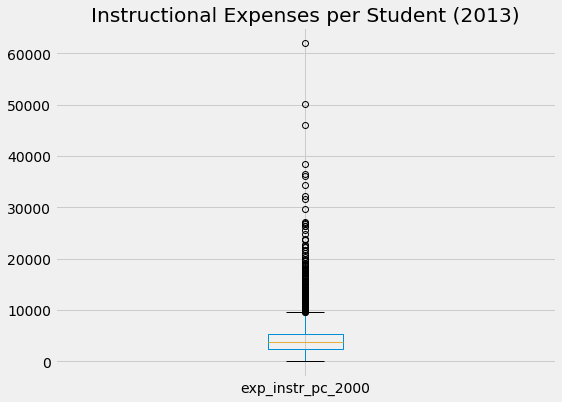

In [327]:
#Check out the cost of expenses spent per student. Right-tail skewed
import matplotlib.pyplot as plt
data.exp_instr_pc_2000.plot(kind='box', title='Instructional Expenses per Student (2013)')
plt.savefig('Expenses per student (2013)');

In [328]:
#We have 6 colleges for which we don't have Instructional Expenses for.  We need to fill those in with median values
data[data.exp_instr_pc_2013.isna()]

super_opeid                                             name_x  \
311          5763                  Central Georgia Technical College   
531            91  Devry University, Devry Institute Of Technolog...   
1112         2484  Metropolitan Community College of Kansas City, MO   
1124         1581                       Middle Georgia State College   
1665         1592                        South Georgia State College   
1959         1585                        University Of North Georgia   

      region_x state_x  fips   cz_x     czname_x  cfips_x county_x    zip  \
311          3      GA    13   8900        Macon    13153  Houston  31088   
531          2      IL    17  24300      Chicago    17031     Cook  60618   
1112         2      MO    29  29502  Kansas City    29095  Jackson  64111   
1124         3      GA    13   8900        Macon    13021     Bibb  31206   
1665         3      GA    13   8601     Waycross    13069   Coffee  31533   
1959         3      GA    13   9400  Gainesville    13187  Lumpkin  30597   

               ...             barrons_2 barrons_3  barrons_4  barrons_5  \
311            ...                     0         0          0          0   
531            ...                     0         0          0          1   
1112           ...                     0         0          0          0   
1124           ...                     0         0          0          0   
1665           ...                     0         0          0          0   
1959           ...                     0         0          1          0   

      barrons_9  barrons_999  HBCU_0  HBCU_1  tech_school  \
311           0            1       1       0            1   
531           0            0       1       0            1   
1112          0            1       1       0            0   
1124          0            1       1       0            0   
1665          0            1       1       0            0   
1959          0            0       1       0            0   

      KNN_quintile_prediction  
311                  0.024626  
531                  0.026498  
1112                 0.017172  
1124                 0.013597  
1665                 0.019386  
1959                 0.018938  

[6 rows x 176 columns]

In [329]:
#Replace column with Median instructional percentage because the series is Skewed to Right Tail of Distribution
data['exp_instr_pc_2013'].fillna(data['exp_instr_pc_2013'].median(), inplace=True)
#Make sure it's stored as a float
data['exp_instr_pc_2013'].astype(int);

In [330]:
data.isna().sum()

super_opeid                   0
name_x                        0
region_x                      0
state_x                       0
fips                          0
cz_x                          0
czname_x                      0
cfips_x                       0
county_x                      9
zip                           0
tier_x                        0
tier_name_x                   0
type_x                        0
iclevel_x                     0
public                        0
barrons                       0
exp_instr_pc_2000            37
exp_instr_pc_2013             0
multi_x                       0
hbcu                          0
flagship                      0
ipeds_enrollment_2013         0
ipeds_enrollment_2000        11
sticker_price_2013          100
sticker_price_2000          191
grad_rate_150_p_2013        172
grad_rate_150_p_2002        215
avgfacsal_2013               71
avgfacsal_2001              164
sat_avg_2013               1245
                           ... 
tier_1  

In [331]:
#Sticker Price seems to be an important feature to predict Upward Mobility as a higher priced school should theoretically give a student a better chance of attaining upward mobility
#We need to impute values where 'sticker_price_2013' is missing.  100 rows in total.
data[data.sticker_price_2013.notnull()].shape
#Here's the Shape of the DataFrame that INCLUDES a Sticker Price:

(2099, 176)

count     2099.000000
mean     15876.169639
std      13745.116389
min       1104.000000
25%       4362.500000
50%       9157.000000
75%      26935.000000
max      51008.000000
Name: sticker_price_2013, dtype: float64


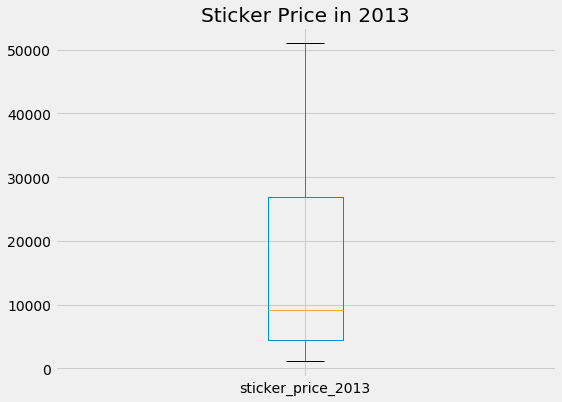

In [332]:
#This is probably an important feature to figure out, so we don't want to just use the Mean.
#Let's look at some ways we can PREDICT the Sticker Price
data.sticker_price_2013.plot(kind='box', title='Sticker Price in 2013');
print(data.sticker_price_2013.describe());
plt.savefig('Boxplot of Sticker Price in 2013.png');
#Average Sticker Price is 15.8k per year with large variation of 13.7k StDev
#Max price is $51k while minimum yearly tuition is $1104

In [333]:
data.sticker_price_2013.median()
#Meanwhile, the MEDIAN Sticker price is ONLY $9157.
#Compared to the average of $15,876, that's a big spread between Median & Mean, so we can't just use one or the other
#Let's PREDICT the Missing Sticker Price values!

9157.0

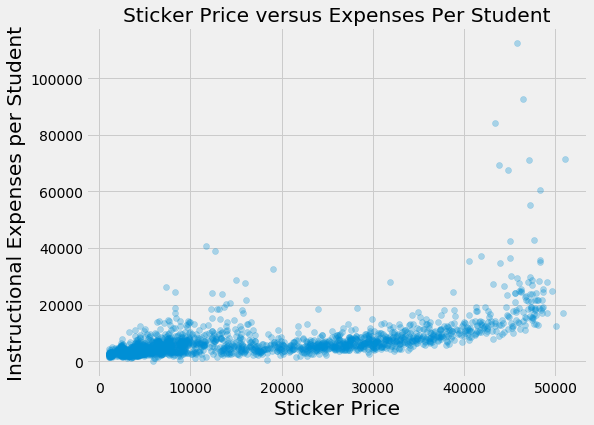

In [334]:
#exp_instr_pc_2013 probably has a good relationship with sticker_price_2013
#Check out the relationship with a Scatter Plot
plt.scatter(x=data['sticker_price_2013'], y=data['exp_instr_pc_2013'], alpha=0.3)
plt.xlabel('Sticker Price', fontsize='x-large')
plt.ylabel('Instructional Expenses per Student', fontsize='x-large')
plt.title('Sticker Price versus Expenses Per Student')
plt.savefig('Relationship between Expenses & Tuition in 2013 figs.png');
#This is why the AVERAGE is so high - lots of right-tailed outliers!

In [335]:
#Predict sticker_price_2013 for the 100 rows that don't have a price
#First, choose which features will be used to predict Sticker Price
#Start by naming the y and X variables
y = data[data.sticker_price_2013.notnull()]['sticker_price_2013']
X = data[data.sticker_price_2013.notnull()][['region_x', 'barrons', 'type_x', 'tier_x', 'iclevel_x', 'exp_instr_pc_2013']]
X.head(5)

region_x  barrons  type_x  tier_x  iclevel_x  exp_instr_pc_2013
0         1      999       3      11          2          3643.3179
1         3        3       2       6          1          7046.2036
2         3      999       1       7          1          3301.0461
3         4      999       3      10          1          5039.5825
4         4        4       1       5          1          5938.9795

In [336]:
#There are no null values in X. All are integers or floats
print(X.isnull().sum())
X.dtypes

region_x             0
barrons              0
type_x               0
tier_x               0
iclevel_x            0
exp_instr_pc_2013    0
dtype: int64


region_x               int64
barrons                int64
type_x                 int64
tier_x                 int64
iclevel_x              int64
exp_instr_pc_2013    float64
dtype: object

# Let's predict the Sticker Price using 6 Features via KNN

In [337]:
#Start by setting up Train-Test-Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
features = ['region_x', 'barrons', 'type_x', 'tier_x', 'iclevel_x', 'exp_instr_pc_2013']

X_train_selected_features = X_train[features]
X_test_selected_features = X_test[features]

#Build a Model using KNeighbors Regressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
import numpy as np

knn = KNeighborsRegressor()
knn.fit(X_train_selected_features, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [338]:
#Create a function to predict (y_pred) and return the RMSE
def knn_optimize(leaf_size, n_neighbors, X_train_selected_features, y_train, y_test):
    knn = KNeighborsRegressor(leaf_size=leaf_size, n_neighbors=n_neighbors)
    knn.fit(X_train_selected_features, y_train)
    y_pred = knn.predict(X_test_selected_features)
    return(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


In [339]:
knn_optimize(20, 9, X_train_selected_features, y_train, y_test)
#Using KNN Regressor, we see an RMSE of $10,161 when predicting Sticker Price

10161.561410417296

In [340]:
#Optimize the test to find the lowest RMSE corresponding with the appropriate leaves & number of neighbors
eval_holder =[]
eval_scores = []
leaf_test = [10, 20, 30, 40]
neighbors_test = [3, 6, 9, 12, 15]

for l in leaf_test:
    for n in neighbors_test:
        results = knn_optimize(l, n, X_train_selected_features, y_train, y_test)
        eval_holder.append([l, n, results])
        eval_scores.append(results)

In [341]:
#Figure out which parameters had the lowest RMSE
min(eval_scores)

9944.832649792705

In [342]:
#Identify which parameters were the best performing
for e in eval_holder:
    if e[2] == min(eval_scores):
        print(e[0], 'leaf', e[1], 'neighbors')

10 leaf 15 neighbors
20 leaf 15 neighbors
30 leaf 15 neighbors
40 leaf 15 neighbors


In [343]:
#Run the Best-Fit Model using the correct leaf_size & n_neighbors
#In this case, it was a TIE! Min RMSE value with 10, 20, 30, 40 leaves and 15 neighbors. Let's go with 30 leaves
knn = KNeighborsRegressor(leaf_size=30, n_neighbors=15)
knn.fit(X_train_selected_features, y_train)

#Store the Predictions
y_pred = knn.predict(X_test_selected_features)

#Evaluate Model once again
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

9944.832649792705

In [344]:
#Apply a model to missing Expenses per Student Data
#Here, we're making a new dataframe for the rows with missing Sticker Prices
missing_sticker = data[~data.sticker_price_2013.notnull()]
missing_sticker.shape

(100, 176)

In [345]:
X_Validation = missing_sticker[features]
#set expenses in dataframe equal to the prediction on the X_Validation features
#Create a new columns for the Predicted Sticker Price
missing_sticker['sticker_predict'] = knn.predict(X_Validation)


C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [346]:
#Let's compare what our model-predicted Median and Mean would have been
print('Median Sticker Price calculated from our model:', round(missing_sticker.sticker_predict.median(),2))
print('Median Sticker Price imputed from rest of data:', round(data.sticker_price_2013.median(),2))

print('Mean Sticker Price calculated from our model:', round(missing_sticker.sticker_predict.mean(),2))
print('Mean Sticker Price imputed from rest of data:', round(data.sticker_price_2013.mean(),2))

#This implies that a lot of the 100 schools really had LOWER costs than the Average or Median schools, roughly $2000 lower median and $4400 lower Mean
#It's a good thing we decided to calculate these as it would have thrown of bad values had we just filled them in.

Median Sticker Price calculated from our model: 7285.3
Median Sticker Price imputed from rest of data: 9157.0
Mean Sticker Price calculated from our model: 11403.43
Mean Sticker Price imputed from rest of data: 15876.17


In [347]:
#Concatenate the 2 dataframes into 1 dataframe as a new column in the original dataframe
#I want to simply insert the null values of sticker_price_2013 with the predicted prices
#Here, we create a new list, combining both the Actual Sticker Price (where available) and Missing Sticker Price (where NOT available)

sticker_price_preds = []
features = ['region_x', 'barrons', 'type_x', 'tier_x', 'iclevel_x', 'exp_instr_pc_2013']

for index, row in data.iterrows():
    val = row['sticker_price_2013']
    #if val=='NaN':
    
    # identify all missing values for Sticker Price and use model to predict. We create an array and pull out the '0' index
    if np.isnan(val):
        x = row[features]
        val = knn.predict([x])[0]
 #       Append to current list
    sticker_price_preds.append(val)
    
#create a new column in Data containing both Actual and Predicted values
data['sticker_price_preds'] = sticker_price_preds



In [348]:
#let's make sure there's no more missing values in our Sticker Price columns
print('The total number of missing sticker prices is:', data['sticker_price_preds'].isnull().sum())

print(data['sticker_price_preds'])
#Hurray! No more missing sticker prices

The total number of missing sticker prices is: 0
0       12298.000000
1       29450.000000
2        3394.000000
3       19740.000000
4        8014.000000
5       32340.000000
6        4302.000000
7       32660.000000
8        6240.939600
9       13255.000000
10      12430.000000
11      35982.000000
12       4132.000000
13       9096.000000
14       4260.000000
15       2175.000000
16       5550.000000
17      30131.000000
18       5192.000000
19       4746.000000
20      28930.000000
21      37300.000000
22      38220.000000
23      22740.000000
24      26106.000000
25       1346.000000
26       6420.000000
27      40660.000000
28       2784.000000
29      34585.000000
            ...     
2169     2393.000000
2170    26300.000000
2171     5583.000000
2172    14082.000000
2173     4448.000000
2174    25960.000000
2175    38030.000000
2176    37120.000000
2177    16820.000000
2178    35048.000000
2179     5664.000000
2180    44222.000000
2181     8557.000000
2182     8860.000000
2183  

In [349]:
#Let's check out the datatypes to see what we're working with
#This will help us understand what we can Regress and Classify on
data.dtypes

super_opeid                  int64
name_x                      object
region_x                     int64
state_x                     object
fips                         int64
cz_x                         int64
czname_x                    object
cfips_x                      int64
county_x                    object
zip                          int64
tier_x                       int64
tier_name_x                 object
type_x                       int64
iclevel_x                    int64
public                       int64
barrons                      int64
exp_instr_pc_2000          float64
exp_instr_pc_2013          float64
multi_x                      int64
hbcu                         int64
flagship                     int64
ipeds_enrollment_2013        int64
ipeds_enrollment_2000      float64
sticker_price_2013         float64
sticker_price_2000         float64
grad_rate_150_p_2013       float64
grad_rate_150_p_2002       float64
avgfacsal_2013             float64
avgfacsal_2001      

# Let's figure out what to solve for. Build new Feature Columns and Y Variables that we'll use to serve as the True Mobility Score. We build 5 different types of Mobility Scores:
1) k_median_nozero_adjusted
2) staircase_score
3) upward_mobility_score (MAIN)
4) downward_mobility_score
5) shoots_and_ladders_score

In [350]:
#First, let's adjust the Median Salary by the Cost of Living Index by dividing the Salary by CoL

data['k_median_nozero_adjusted'] = data['k_median_nozero'] / (data['Index'] / 100)
data['k_median_nozero_adjusted']
#This will deflate the salaries in expensive states (CA, NY, HI) and inflate salaries in less-expensive states (MS, AR, OK)

0       17391.304348
1       48630.887185
2       38815.789474
3       26171.593367
4       34691.943128
5       40530.582167
6       24539.425203
7       47816.349384
8       25678.496868
9       35490.196078
10      46006.066734
11      51864.035088
12      29399.796541
13      40446.927374
14      32067.039106
15      30106.382979
16      37020.810515
17      94473.102432
18      37500.000000
19      20394.736842
20      36180.124224
21      59014.557671
22      50101.419878
23      43505.807814
24      36182.756080
25      25594.808940
26      27341.964966
27      54462.474645
28      36008.918618
29      55319.148936
            ...     
2169    30106.382979
2170    45744.680851
2171    37340.425532
2172    41098.677518
2173    34237.995825
2174    44572.025052
2175    52047.413793
2176    61851.475076
2177    21960.206338
2178    34895.457823
2179    26504.188880
2180    65919.282511
2181    35500.747384
2182    21665.438467
2183    19732.441472
2184    45043.103448
2185    29607

count    2199.000000
mean       -0.008287
std         0.216992
min        -0.915575
25%        -0.146010
50%        -0.023284
75%         0.115745
max         0.946999
Name: staircase_score, dtype: float64


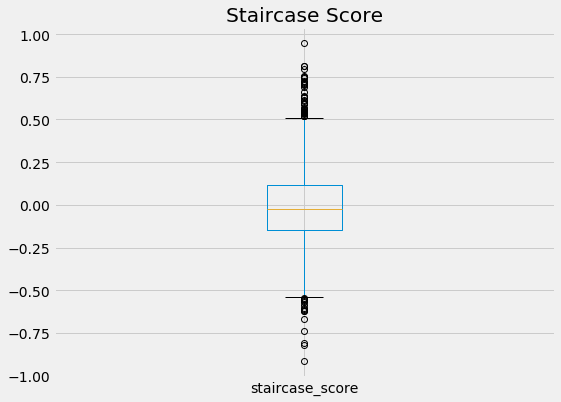

In [351]:
#We're Creating New Features & Columns that better explain our data and mobility score
#Staircase_score is looking at the straightforward change in percentage of Kids versus Parents in 1st, 2nd, 4th and 5th Quintile buckets (excluded 3rd)
#This is a straight Addition of the Difference of Parents & Kids percentiles. The higher the score, the better
#It simply represents a straightforward question of 'does this school help students progress forward up the quintile brackets?'
data['staircase_score'] = data.apply(lambda row: (row['par_q1'] - row['k_q1']) + (row['par_q2'] - row['k_q2']) + (row['k_q4'] - row['par_q4']) + (row['k_q5'] - row['par_q5']) , axis=1)
print(data['staircase_score'].describe())
#Overall, it seems that colleges are relativelly stationary in that they Don't help students increase along income brackets
#However, there are labels on either end of the spectrum.  This looks to be a Normal Distribution
data.staircase_score.plot(kind='box')
plt.title('Staircase Score')
plt.savefig('Staircase Score Boxplot.png')

count    2199.000000
mean        0.803484
std         0.319901
min         0.171420
25%         0.564913
50%         0.735896
75%         0.998156
max         2.173745
Name: upward_mobility_score, dtype: float64
Median Upward Mobility Score is: 0.7358958170833334


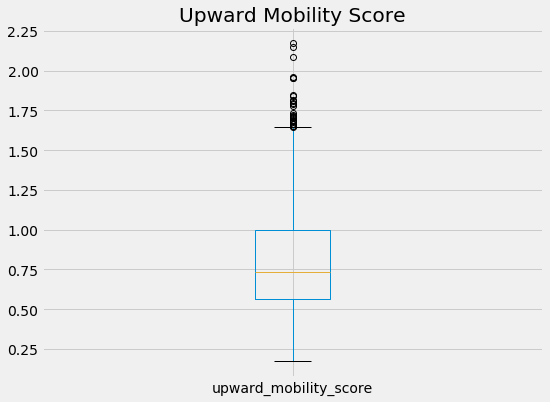

In [352]:
#However, we want to answer the Question: "Does this school do a good job of increasing the mobility of particularly those students in the lower socioeconomic classes?"
#UPWARD MOBILITY SCORE is computed by taking a weighted sum of the following:
#kq5_cond_parq1 * 1.5
#(kq5_cond_parq2 + kq4_cond_parq1)*1.25
#(kq5_cond_parq3 + kq4_cond_parq2 + kq3_cond_parq1)*1
#This is intended to overweight the ability of a school to manage to get a student from the 1st to the 5th Quintile
data['upward_mobility_score'] = data['kq5_cond_parq1']*1.5 + ((data['kq5_cond_parq2'] + data['kq4_cond_parq1'])/2)*1.25 + ((data['kq5_cond_parq3'] + data['kq4_cond_parq2'] + data['kq3_cond_parq1'])/3)*1
print(data['upward_mobility_score'].describe())

#Check out the statistics of this data
data.upward_mobility_score.plot(kind='box')
plt.title('Upward Mobility Score')
plt.savefig('Upward Mobility Score BoxPlot.png');
#There are some schools that that do an absolutely Marvelous job as Outliers on helping Upward Mobility Rates
#It's good to see this value is positive
print("Median Upward Mobility Score is:", data['upward_mobility_score'].median())

In [353]:

#Check out Upward Mobility Score correlation with Sticker Price
data['sticker_price_preds'].corr(data['upward_mobility_score'])
#Decent correlation amongst the two

0.6120465301083636

count    2199.000000
mean       -0.501892
std         0.156160
min        -1.205574
25%        -0.604058
50%        -0.499938
75%        -0.381430
max        -0.108183
Name: downward_mobility_score, dtype: float64


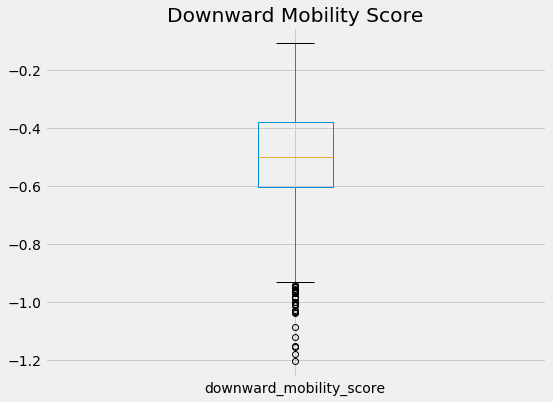

In [354]:
#We would like to know not only if colleges help produce Upward Mobility, but perhaps some induce Downward Mobility
#This may be because the cost burden is high or the students are going to Graduate School
#DOWNWARD MOBILITY SCORE is computed by taking a weighted sum of the following:
#kq1_cond_parq5 * 1.5
#(kq2_cond_parq5 + kq1_cond_parq4)*1.25
#(kq3_cond_parq5 + kq2_cond_parq4 + kq1_cond_parq3)*1
#This is intended to overweight the ability of a school to manage to get a student from the 5th to the 1st Quintile
data['downward_mobility_score'] = -1*(data['kq1_cond_parq5']*1.5 + ((data['kq2_cond_parq5'] + data['kq1_cond_parq4'])/2)*1.25 + ((data['kq3_cond_parq5'] + data['kq2_cond_parq4'] + data['kq1_cond_parq3'])/3)*1)
print(data['downward_mobility_score'].describe())

#Check out the statistics of this data
data.downward_mobility_score.plot(kind='box')
plt.title('Downward Mobility Score')
plt.savefig('Downward Mobility Score BoxPlot.png');
#There are some schools that do a good job of dragging down students from the Upper Rungs of Income
#We'll revisit these schools in our SQL Analysis

count    2199.000000
mean        0.301593
std         0.447744
min        -0.996524
25%        -0.015790
50%         0.224951
75%         0.597729
max         2.065562
Name: shoots_and_ladders, dtype: float64


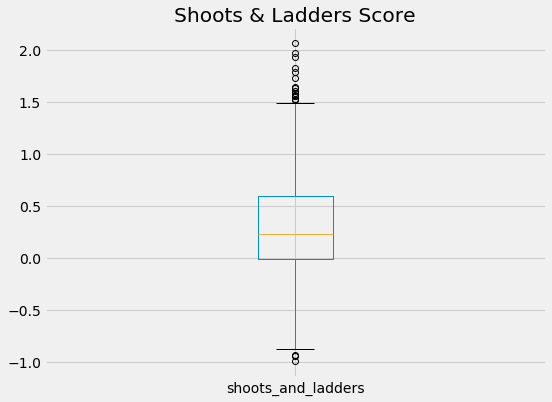

In [355]:
#Create a Final measure of Mobility, termed SHOOTS & LADDERS Score that takes into account both UPWARD & DOWNWARD Mobility
#This is just the sum of the individual Upward Mobility and Downward Mobility Scores
data['shoots_and_ladders'] = data['upward_mobility_score'] + data['downward_mobility_score']
print(data['shoots_and_ladders'].describe())

#Check out the statistics of this data
data.shoots_and_ladders.plot(kind='box')
plt.title('Shoots & Ladders Score')
plt.savefig('Shoots & Ladders Score BoxPlot.png');
#There are lots of positive outliers and just a couple negative outliers

In [356]:
#This has an Extremely High (97.2%) correlation with the straightforward Upward Mobility Score, so we don't want to include this
#Furthermore, it puts additional emphasis on the Downward Mobility schools, which we're not concerned about in our case as we are doing a study on Upward Mobility
data['shoots_and_ladders'].corr(data['upward_mobility_score'])

0.9719262852588773

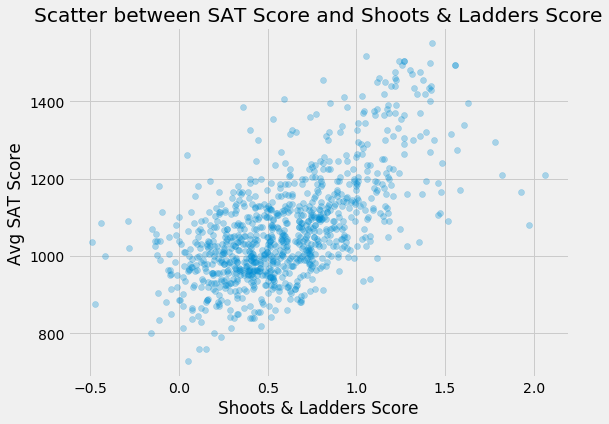

In [357]:
#Check out the relationship between SAT Scores & Shoots & Ladder Score
plt.scatter(x=data['shoots_and_ladders'], y=data['sat_avg_2013'], alpha=0.3)
plt.ylabel('Avg SAT Score')
plt.xlabel('Shoots & Ladders Score')
plt.title('Scatter between SAT Score and Shoots & Ladders Score')
plt.savefig('Scatter between SAT Score & Shoots_&_Ladders Score.png')
#Looks like SAT and Shoots & Ladders Scores actually have a decent relationship

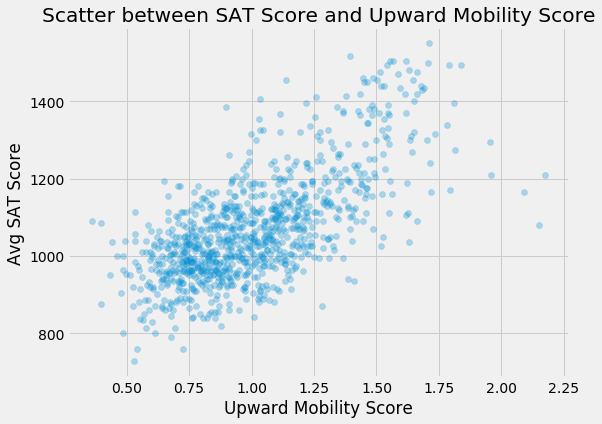

In [358]:
#Check out the relationship between SAT Scores & Upward Mobility Score
plt.scatter(x=data['upward_mobility_score'], y=data['sat_avg_2013'], alpha=0.3)
plt.ylabel('Avg SAT Score')
plt.xlabel('Upward Mobility Score')
plt.title('Scatter between SAT Score and Upward Mobility Score')
plt.savefig('Scatter between SAT Score & Upward Mobility Score.png')

0.7893692344331125


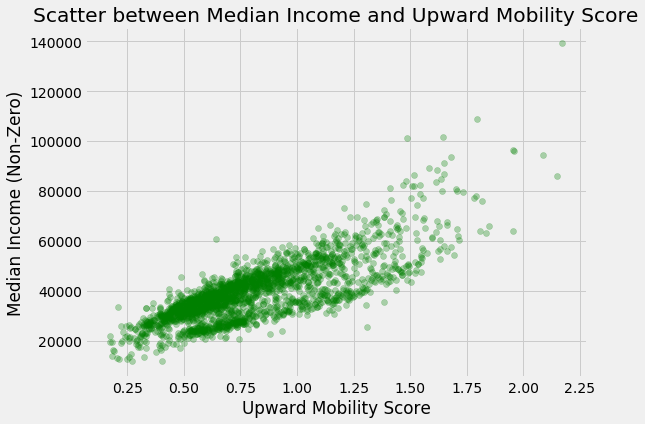

In [359]:
#Check out the relationship between K_median_nozero Income & Upward Mobility Score
plt.scatter(x=data['upward_mobility_score'], y=data['k_median_nozero_adjusted'], alpha=0.3, color='g')
plt.ylabel('Median Income (Non-Zero)')
plt.xlabel('Upward Mobility Score')
plt.title('Scatter between Median Income and Upward Mobility Score')
plt.savefig('Scatter between Median Income & Upward Mobility Score.png');
#There's a decent correlation (78%) between Salary (adjusted) and Upward Mobility
print(data['k_median_nozero_adjusted'].corr(data['upward_mobility_score']))

In [360]:
#Let's create a new Table on which to run more analysis
selected_columns = ['super_opeid',
'name_x',
'type_x',
'tier_x',
'iclevel_x',
'region_x',
'barrons',
'exp_instr_pc_2013',
'hbcu',
'ipeds_enrollment_2013',
'sticker_price_2013',
'public', 
'grad_rate_150_p_2013',
'avgfacsal_2013',
'sat_avg_2013',
'scorecard_netprice_2013',
'scorecard_rej_rate_2013',
'endowment_pc_2000',
'exp_instr_2012',
'asian_or_pacific_share_fall_2000',
'black_share_fall_2000',
'hisp_share_fall_2000',
'pct_arthuman_2000',
'pct_business_2000',
'pct_health_2000',
'pct_multidisci_2000',
'pct_publicsocial_2000',
'pct_stem_2000',
'pct_socialscience_2000',
'pct_tradepersonal_2000',
'k_median_nozero_adjusted', 
'staircase_score',
'upward_mobility_score',
'downward_mobility_score',
'shoots_and_ladders',
'sticker_price_preds',
'tech_school'
]

table = data[selected_columns] 
table.head(2)

super_opeid                                           name_x  type_x  \
0        30955  ASA Institute Of Business & Computer Technology       3   
1         3537                     Abilene Christian University       2   

   tier_x  iclevel_x  region_x  barrons  exp_instr_pc_2013  hbcu  \
0      11          2         1      999          3643.3179     0   
1       6          1         3        3          7046.2036     0   

   ipeds_enrollment_2013     ...       pct_stem_2000  pct_socialscience_2000  \
0                   4711     ...           81.970650                0.000000   
1                   3727     ...           11.318242               31.691078   

   pct_tradepersonal_2000  k_median_nozero_adjusted  staircase_score  \
0                0.000000              17391.304348         0.495816   
1                0.133156              48630.887185        -0.248421   

   upward_mobility_score  downward_mobility_score  shoots_and_ladders  \
0               0.414779                -0.641118           -0.226339   
1               0.962966                -0.506532            0.456434   

  sticker_price_preds  tech_school  
0             12298.0            1  
1             29450.0            0  

[2 rows x 37 columns]

0.36691275545279267


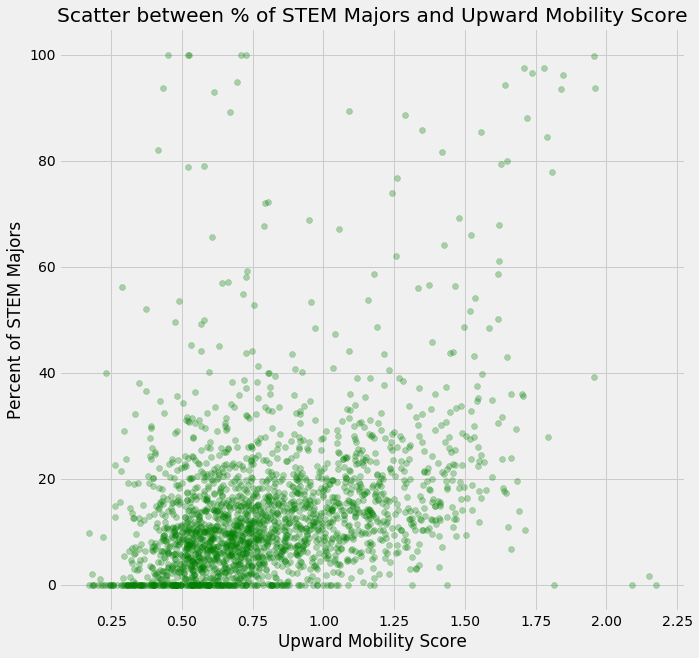

In [361]:
#Check out the relationship between Percent in STEM Majors & Upward Mobility Score
plt.figure(figsize=(10,10))
plt.scatter(x=data['upward_mobility_score'], y=data['pct_stem_2000'], alpha=0.3, color='green')
plt.ylabel('Percent of STEM Majors')
plt.xlabel('Upward Mobility Score')
plt.title('Scatter between % of STEM Majors and Upward Mobility Score')
plt.savefig('Scatter between % of STEM Majors & Upward Mobility Score.png');
#There's NOT a good correlation between STEM percentage and Upward Mobility
print(data['pct_stem_2000'].corr(data['upward_mobility_score']))

# Hey, but wait, does being in an environment with 'socially elite' help promote Upward Mobility? 
Let's create a Feature for that, looking at the background of the Student Population and where they come from.  Afterall, sometimes they say, "it's not WHAT you know, it's WHO you know"

In [362]:
#We have data about the Parent's Income Quintiles, so we can see what Socioeconomic status the students are coming from
#Let's place more importance on the Top Quintiles. We can split the top 20% between 10-20% and Top 10% as we have enough data.
#Create a Feature calculating the % of Students from the 10-20% percentile using difference between Top 20% and Top 10%

data['par_10-20pc'] = data['par_q5'] - data['par_top10pc']

#Let's create a 'social_eliteness_score' to describe the school's student body socioeconomic background
#We place 2x weight on Top 10%, 1.5x on 10-20%, and 1x on 20-40%. We multiply the % of Student Body from this background by the Multiplier
#This skews the score to the emphasize a student body that has a considerable amount of students from high wealth backgrounds

data['social_eliteness_score'] = (2*data['par_top10pc']) + (1.5*data['par_10-20pc']) + (1*data['par_q4'])

#Add this to the Table Datafrom from the 'data' Dataframe

table['social_eliteness_score'] = data['social_eliteness_score']

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


count    2199.000000
mean        0.699856
std         0.310423
min         0.069344
25%         0.454127
50%         0.668762
75%         0.905299
max         1.664163
Name: social_eliteness_score, dtype: float64
Correlation with UM Score: 0.7490984542681535


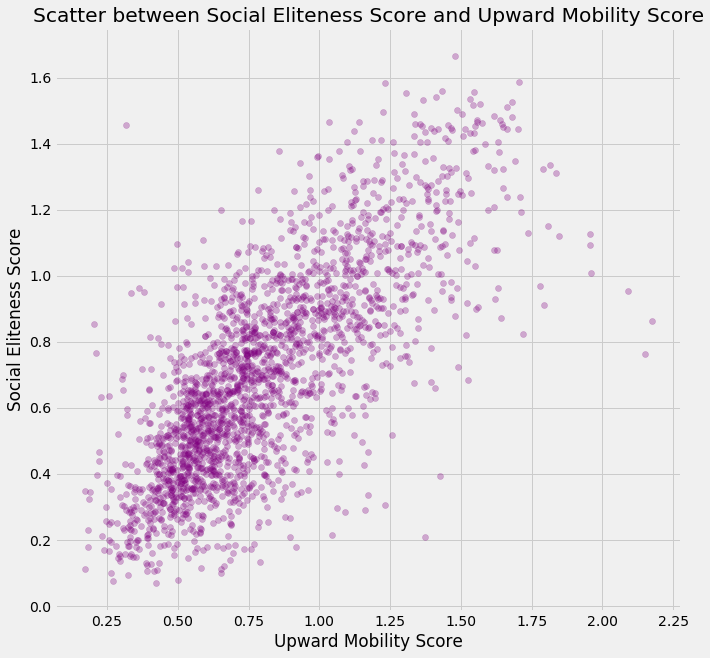

In [363]:
#Now, we have a new feature measuring 'social elitness', let's observe the correlation with 'upward mobility score'
#Check out the relationship between Social Elitness Score & Upward Mobility Score
plt.figure(figsize=(10,10))
plt.scatter(x=data['upward_mobility_score'], y=data['social_eliteness_score'], alpha=0.3, color='purple')
plt.ylabel('Social Eliteness Score')
plt.xlabel('Upward Mobility Score')
plt.title('Scatter between Social Eliteness Score and Upward Mobility Score')
plt.savefig('Scatter between Social Eliteness Score & Upward Mobility Score.png')
#There's a very good correlation between Social Eliteness Score and Upward Mobility
#Proves there's something to say about the people you hang out with
print(data['social_eliteness_score'].describe())
print("Correlation with UM Score:", data['social_eliteness_score'].corr(data['upward_mobility_score']))

# Implement Binary Tree Regressor to see which Features are most Important

In [364]:
#Let's just look at the Features to see which is most correlated to Upward Mobility Scores
table[table.columns[1:]].corr()['upward_mobility_score'][:]
#Based on this simply analysis, it looks like Tier, Barrons, Sticker Price, Graduation Rate, Faculty Salary and SAT Avg are the most important features
#Interestingly, the Staircase Score is not correlated at all (-0.009785)
#It's interesting to point out that the social eliteness score is 75% correlated with upward mobility
#Not coincidentally, the k_median_nozero_adjusted feature is highly correlated (78.9%)

type_x                              0.129681
tier_x                             -0.719048
iclevel_x                          -0.582614
region_x                           -0.206183
barrons                            -0.666694
exp_instr_pc_2013                   0.309037
hbcu                               -0.058487
ipeds_enrollment_2013               0.065616
sticker_price_2013                  0.633973
public                             -0.314694
grad_rate_150_p_2013                0.688436
avgfacsal_2013                      0.681873
sat_avg_2013                        0.675075
scorecard_netprice_2013             0.295388
scorecard_rej_rate_2013             0.326281
endowment_pc_2000                   0.109313
asian_or_pacific_share_fall_2000    0.358761
black_share_fall_2000              -0.239047
hisp_share_fall_2000               -0.037247
pct_arthuman_2000                   0.196778
pct_business_2000                  -0.055363
pct_health_2000                    -0.345570
pct_multid

In [365]:
#First, let's clean up any missing values for Features with only a few missing values
table.isnull().sum()

super_opeid                            0
name_x                                 0
type_x                                 0
tier_x                                 0
iclevel_x                              0
region_x                               0
barrons                                0
exp_instr_pc_2013                      0
hbcu                                   0
ipeds_enrollment_2013                  0
sticker_price_2013                   100
public                                 0
grad_rate_150_p_2013                 172
avgfacsal_2013                        71
sat_avg_2013                        1245
scorecard_netprice_2013                8
scorecard_rej_rate_2013              967
endowment_pc_2000                   1481
exp_instr_2012                        61
asian_or_pacific_share_fall_2000      11
black_share_fall_2000                 11
hisp_share_fall_2000                  11
pct_arthuman_2000                     14
pct_business_2000                     14
pct_health_2000 

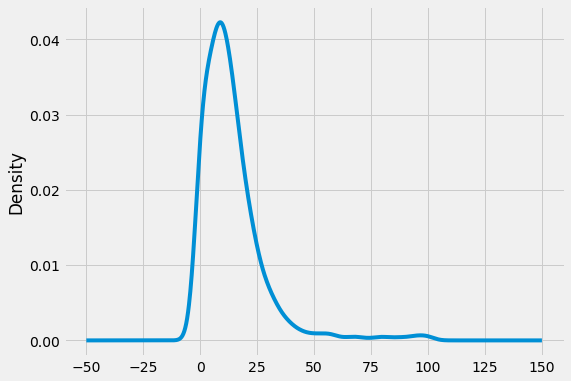

In [366]:
#Let's see if we have to worry about skewness when looking at % Majors data
table.pct_stem_2000.plot(kind='density');

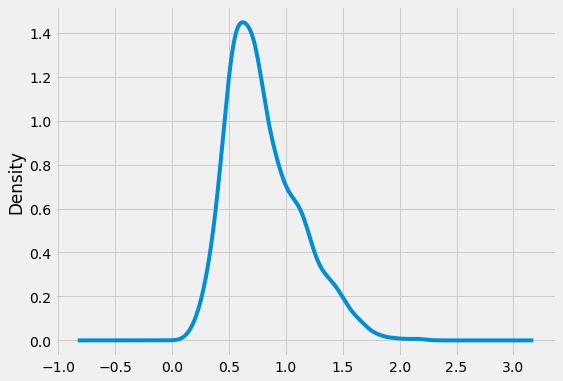

In [367]:
table.upward_mobility_score.plot(kind='density');

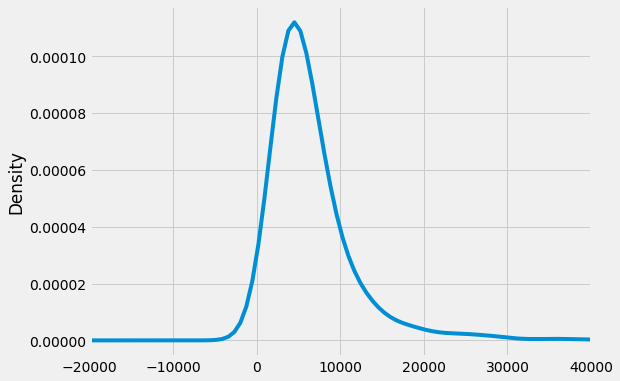

In [368]:
table.exp_instr_pc_2013.plot(kind='density',xlim=(-20000,40000));

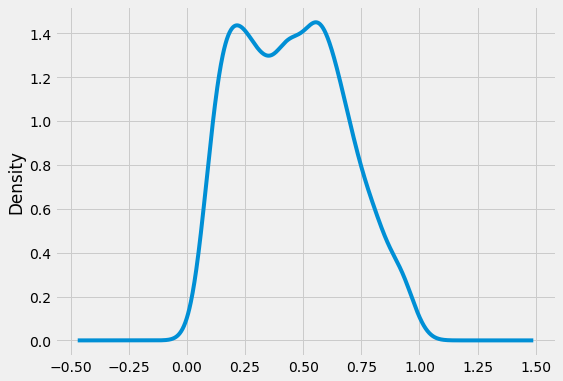

In [369]:
table.grad_rate_150_p_2013.plot(kind='density');

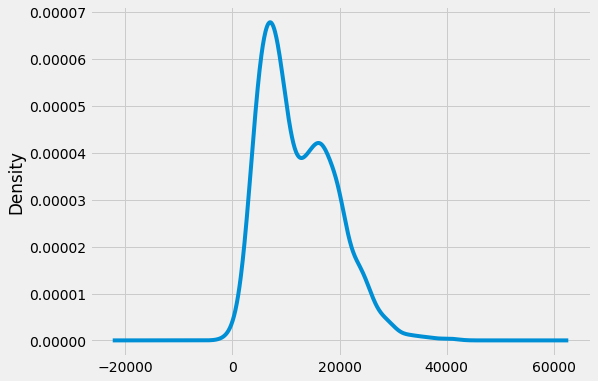

In [370]:
table.scorecard_netprice_2013.plot(kind='density');

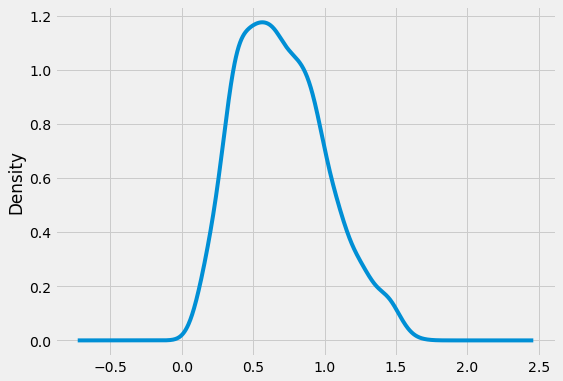

In [371]:
table.social_eliteness_score.plot(kind='density');

In [372]:
#Let's fill in average values for the features that just have between 8-15 missing values
#Replace column with average value for the following features
#Make sure it's stored as a float
table['asian_or_pacific_share_fall_2000'].fillna(table['asian_or_pacific_share_fall_2000'].mean(), inplace=True)
table['asian_or_pacific_share_fall_2000'].astype(float)

table['black_share_fall_2000'].fillna(table['black_share_fall_2000'].mean(), inplace=True)
table['black_share_fall_2000'].astype(float)

table['hisp_share_fall_2000'].fillna(table['hisp_share_fall_2000'].mean(), inplace=True)
table['hisp_share_fall_2000'].astype(float)

table['pct_arthuman_2000'].fillna(table['pct_arthuman_2000'].mean(), inplace=True)
table['pct_arthuman_2000'].astype(float)

table['pct_business_2000'].fillna(table['pct_business_2000'].mean(), inplace=True)
table['pct_business_2000'].astype(float)

table['pct_health_2000'].fillna(table['pct_health_2000'].mean(), inplace=True)
table['pct_health_2000'].astype(float)

table['pct_multidisci_2000'].fillna(table['pct_multidisci_2000'].mean(), inplace=True)
table['pct_multidisci_2000'].astype(float)

table['pct_publicsocial_2000'].fillna(table['pct_publicsocial_2000'].mean(), inplace=True)
table['pct_publicsocial_2000'].astype(float)

table['pct_stem_2000'].fillna(table['pct_stem_2000'].mean(), inplace=True)
table['pct_stem_2000'].astype(float)

table['pct_socialscience_2000'].fillna(table['pct_socialscience_2000'].mean(), inplace=True)
table['pct_socialscience_2000'].astype(float)

table['pct_tradepersonal_2000'].fillna(table['pct_tradepersonal_2000'].mean(), inplace=True)
table['pct_tradepersonal_2000'].astype(float)

table['avgfacsal_2013'].fillna(table['avgfacsal_2013'].mean(), inplace=True)
table['avgfacsal_2013'].astype(float)


#I'm using Median for scorecard_netprice_2013 as it's a right-tail skewed distribution
table['scorecard_netprice_2013'].fillna(table['scorecard_netprice_2013'].median(), inplace=True)
table['scorecard_netprice_2013'].astype(float);


C:\Users\Owner\Anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [373]:
#Before delving into the Decision Tree, let's just look at 1 feature, 'pct_stem_2000' to se if there's a good explanatory value
#We're going to look at the relationship with upward_mobility_score
from sklearn import metrics
import numpy as np

# define a function that calculates the RMSE for a given split of ‘stem % Score’
def stem_score_split(stem):
    higher_stem_UMS = table[table.pct_stem_2000 >= stem].upward_mobility_score.mean()
    lower_stem_UMS = table[table.pct_stem_2000 < stem].upward_mobility_score.mean()
    table['UMS_prediction'] = np.where(table.pct_stem_2000 >= stem, higher_stem_UMS, lower_stem_UMS)
    return np.sqrt(metrics.mean_squared_error(table.upward_mobility_score, table.UMS_prediction))


In [374]:
table.pct_stem_2000.describe()

count    2199.000000
mean       13.952227
std        14.358131
min         0.000000
25%         5.304225
50%        10.810811
75%        18.131090
max       100.000000
Name: pct_stem_2000, dtype: float64

In [375]:
#Calculate RMSE for tree which splits on stem_Score > 15
print('RMSE:{}'.format(stem_score_split(15)))

RMSE:0.303794424809411


C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [376]:
int(table.pct_stem_2000.min())
table.pct_stem_2000.max()

100.0

In [377]:
#Check all possible stem score Splits
stem_score_range = range(0,100)
stem_score_range

range(0, 100)

In [378]:
RMSE = [stem_score_split(stem) for stem in stem_score_range]

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

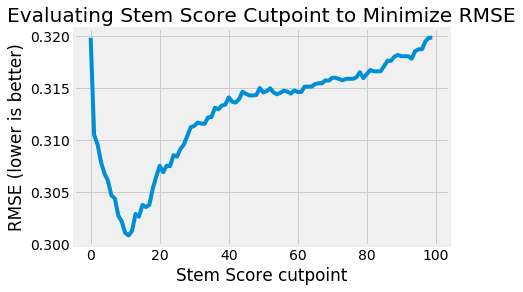

In [379]:
#Let's see a plot of this
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

plt.plot(stem_score_range, RMSE)
plt.xlabel('Stem Score cutpoint')
plt.ylabel('RMSE (lower is better)')
plt.title('Evaluating Stem Score Cutpoint to Minimize RMSE')
plt.savefig('Evaluating Stem Score cutpoint.png');
#Looks like the cut point should be around 12% STEM Majors or so

In [380]:
#Before delving into the Decision Tree, let's just look at 1 feature, 'tier_x' to se if there's a good explanatory value
#We're going to look at the relationship with upward_mobility_score
from sklearn import metrics
import numpy as np

# define a function that calculates the RMSE for a given split of ‘Tier’
def tier_split(tier):
    higher_tier_UMS = table[table.tier_x >= tier].upward_mobility_score.mean()
    lower_tier_UMS = table[table.tier_x < tier].upward_mobility_score.mean()
    table['UMS_prediction'] = np.where(table.tier_x >= tier, higher_tier_UMS, lower_tier_UMS)
    return np.sqrt(metrics.mean_squared_error(table.upward_mobility_score, table.UMS_prediction))


In [381]:
#Calculate RMSE for tree which splits on tier_x > 8
print('RMSE:{}'.format(tier_split(8)))

RMSE:0.24880623964093185


C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [382]:
#Check all possible Tier Splits
tier_range = range(table.tier_x.min(), table.tier_x.max(), 1)
RMSE = [tier_split(tier) for tier in tier_range]

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

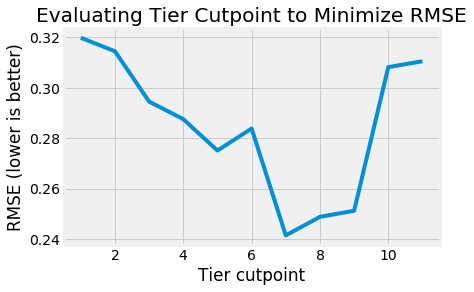

In [383]:
#Let's see a plot of this
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

plt.plot(tier_range, RMSE)
plt.xlabel('Tier cutpoint')
plt.ylabel('RMSE (lower is better)')
plt.title('Evaluating Tier Cutpoint to Minimize RMSE')
plt.savefig('Evaluating Tier cutpoint.png');

C:\Users\Owner\Anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


count    2199.000000
mean        0.449315
std         0.216922
min         0.020202
25%         0.268163
50%         0.449315
75%         0.603290
max         1.000000
Name: grad_rate_150_p_2013, dtype: float64
Median Graduation Rate is: 0.44931505648051384


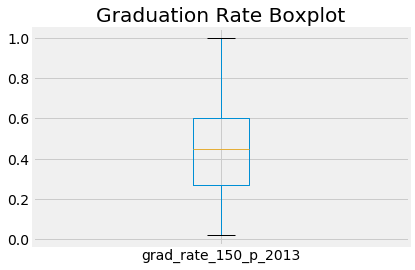

In [384]:
#Replace Average Grad Rate by the Mean after inspecting the data and ensuring it looks plausible
table['grad_rate_150_p_2013'].fillna(table['grad_rate_150_p_2013'].mean(), inplace=True)
table['grad_rate_150_p_2013'].astype(float)
table.boxplot('grad_rate_150_p_2013')
print(table['grad_rate_150_p_2013'].describe())
print("Median Graduation Rate is:", table['grad_rate_150_p_2013'].median())
#There doesn't seem to be any strong skewness in this data, so we won't forecast this one
#Median and Mean are roughly equal at 0.449
plt.title('Graduation Rate Boxplot')
plt.savefig('Graduation Rate Boxplot.png');

# However, we still need to figure out the Acceptance Rate (scorecard_rej_rate_2013) which may be a predictor of Upward Mobility


0.3262809234372009


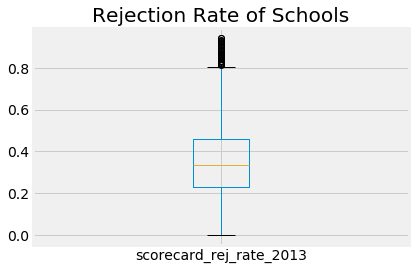

In [385]:
#There are 976 Missing values for Rejection Rate
table.boxplot('scorecard_rej_rate_2013')
plt.title('Rejection Rate of Schools')
plt.savefig('Rejection Rate of Schools.png');
print(table['scorecard_rej_rate_2013'].corr(table['upward_mobility_score']))
#There are lots of outliers so we'll predict this using Random Forest Regressor

In [386]:
#First, choose which features will be used to predict Rejection Rate
#Barron's Selectivity Score is probably a useful feature - definitely include that!
feature_cols = [
'type_x',
'tier_x',
'iclevel_x',
'region_x',
'barrons',
'exp_instr_pc_2013',
'grad_rate_150_p_2013',
'avgfacsal_2013',
'scorecard_netprice_2013',
'sticker_price_preds',
'tech_school'
]

In [387]:
table.isnull().sum()

super_opeid                            0
name_x                                 0
type_x                                 0
tier_x                                 0
iclevel_x                              0
region_x                               0
barrons                                0
exp_instr_pc_2013                      0
hbcu                                   0
ipeds_enrollment_2013                  0
sticker_price_2013                   100
public                                 0
grad_rate_150_p_2013                   0
avgfacsal_2013                         0
sat_avg_2013                        1245
scorecard_netprice_2013                0
scorecard_rej_rate_2013              967
endowment_pc_2000                   1481
exp_instr_2012                        61
asian_or_pacific_share_fall_2000       0
black_share_fall_2000                  0
hisp_share_fall_2000                   0
pct_arthuman_2000                      0
pct_business_2000                      0
pct_health_2000 

In [388]:
#Predict rejection rate for the 976 rows that don't have Rejection Rate
#Start by naming the y and X variables
X = table[table.scorecard_rej_rate_2013.notnull()][feature_cols]
y = table[table.scorecard_rej_rate_2013.notnull()]['scorecard_rej_rate_2013']
X.head()

type_x  tier_x  iclevel_x  region_x  barrons  exp_instr_pc_2013  \
1       2       6          1         3        3          7046.2036   
2       1       7          1         3      999          3301.0461   
4       1       5          1         4        4          5938.9795   
5       2       6          1         1        4         10505.1040   
7       2       6          1         2        4          6377.8945   

   grad_rate_150_p_2013  avgfacsal_2013  scorecard_netprice_2013  \
1              0.565611          5508.0                  20836.0   
2              0.449315          4752.0                   7887.0   
4              0.261176          5986.0                  14705.0   
5              0.625142         11315.0                  20512.0   
7              0.544513          7453.0                  15774.0   

   sticker_price_preds  tech_school  
1              29450.0            0  
2               3394.0            0  
4               8014.0            0  
5              32340.0            0  
7              32660.0            0

In [389]:
#Making sure there's no missing values in my feature columns
X.isnull().sum()

type_x                     0
tier_x                     0
iclevel_x                  0
region_x                   0
barrons                    0
exp_instr_pc_2013          0
grad_rate_150_p_2013       0
avgfacsal_2013             0
scorecard_netprice_2013    0
sticker_price_preds        0
tech_school                0
dtype: int64

In [390]:
#I'm going to make this straightforward
#Import the Library and instantiate the model
from sklearn.ensemble import RandomForestRegressor
rfreg = RandomForestRegressor()
rfreg

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [391]:
# list of values to try for n_estimators. Figure out how many Trees you need to build.
#Here’s we’re testing up to 1000 trees by increments of 50 WARNING: SLOW!
estimator_range = range(100, 2000, 100)
RMSE_scores = []

from sklearn.model_selection import cross_val_score
# use 5-fold cross-validation with each value of n_estimators (WARNING: SLOW!)
for estimator in estimator_range:
    rfreg = RandomForestRegressor(n_estimators=estimator, random_state=42)
    MSE_scores = cross_val_score(rfreg, X, y, cv=5, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))


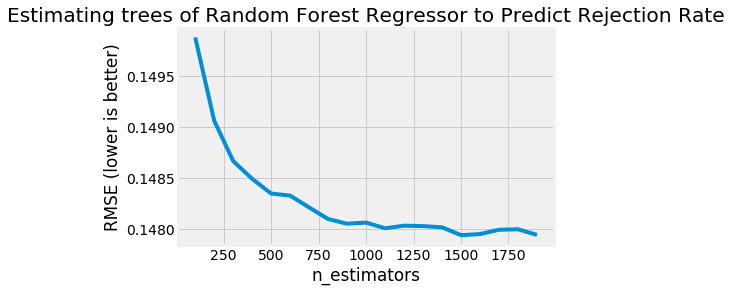

In [392]:
# plot n_estimators (x-axis) versus RMSE (y-axis)
plt.plot(estimator_range, RMSE_scores)
plt.xlabel('n_estimators')
plt.ylabel('RMSE (lower is better)');
plt.title('Estimating trees of Random Forest Regressor to Predict Rejection Rate')
plt.savefig('Estimating trees of Random Forest Regressor to Predict Rejection Rate.png')
#In this model, you'd like to select 125 Trees as it's near the bottom


In [393]:
#We could look at tuning another hyperparamter, max_features, here but we'll proceed
# max_features=8 is best and n_estimators=150 is sufficiently large
#Let's FIT the Model!
rfreg = RandomForestRegressor(n_estimators=800, max_features=8, oob_score=True, random_state=1)
rfreg.fit(X, y)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=800, n_jobs=None, oob_score=True, random_state=1,
           verbose=0, warm_start=False)

In [394]:
# compute feature importances
pd.DataFrame({'feature':feature_cols, 'importance':rfreg.feature_importances_}).sort_values('importance', ascending=False)
#Graduation Rate is important in prediction Rejection Rate
#Interestingly, Barrons Selectivity was not important

feature  importance
6      grad_rate_150_p_2013    0.271880
1                    tier_x    0.125197
9       sticker_price_preds    0.118831
8   scorecard_netprice_2013    0.114237
7            avgfacsal_2013    0.111391
5         exp_instr_pc_2013    0.107658
4                   barrons    0.096979
3                  region_x    0.036805
0                    type_x    0.006755
10              tech_school    0.005797
2                 iclevel_x    0.004469

In [395]:
missing_rejection_rate = table[~table.scorecard_rej_rate_2013.notnull()]
missing_rejection_rate.shape
#There's 967 missing values for rejection rate

(967, 39)

In [396]:
X_Validation = missing_rejection_rate[feature_cols]
missing_rejection_rate['rejection_rate_predict'] = rfreg.predict(X_Validation)

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [397]:
#Let's compare what our model-predicted Median and Mean would have been for Rejection Rate
print('Median Rejection Rate calculated from our model:', round(missing_rejection_rate.rejection_rate_predict.median(),2))
print('Median Rejection Rateimputed from rest of data:', round(table.scorecard_rej_rate_2013.median(),2))

print('Mean Rejection Rate calculated from our model:', round(missing_rejection_rate.rejection_rate_predict.mean(),2))
print('Mean Rejection Rate imputed from rest of data:', round(table.scorecard_rej_rate_2013.mean(),2))

#We would have had a dataset that skewed the rejection rate to the high side had we used Mean or Median
#Perhaps the schools with Low Rejection Rates are ashamed to admit it and thus input nothing?

Median Rejection Rate calculated from our model: 0.28
Median Rejection Rateimputed from rest of data: 0.34
Mean Rejection Rate calculated from our model: 0.27
Mean Rejection Rate imputed from rest of data: 0.36


In [398]:
rejection_rate_preds = []
features = feature_cols

for index, row in table.iterrows():
    val = row['scorecard_rej_rate_2013']
    
    #if the val == NaN:
    if np.isnan(val):
        x = row[features]
        val = rfreg.predict([x])[0]
    #append this to the current list
    rejection_rate_preds.append(val)

In [399]:
#Create a new column in table containing both Actual (where applicable) and Predicted values
table['rejection_rate_preds'] = rejection_rate_preds 
table['rejection_rate_preds'].head(7)

#Woohoo! Now we have a new feature - rejection rate - that we can use to build the model

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0    0.174515
1    0.510600
2    0.291000
3    0.230372
4    0.474000
5    0.318600
6    0.214041
Name: rejection_rate_preds, dtype: float64

# Now that we're finished with Feature Engineering, Let's Build out a Binary Regression Tree

In [400]:
#Now, let's build a REGRESSION TREE to finally see the importance of all these features!
#Define X & y.  Don't include any strings or objects in X! or NaNs!
feature_cols = [
'type_x',
'tier_x',
'iclevel_x',
'region_x',
'barrons',
'exp_instr_pc_2013',
'hbcu',
'ipeds_enrollment_2013',
'public', 
'avgfacsal_2013',
'scorecard_netprice_2013',
'grad_rate_150_p_2013',
'asian_or_pacific_share_fall_2000',
'black_share_fall_2000',
'hisp_share_fall_2000',
'pct_arthuman_2000',
'pct_business_2000',
'pct_health_2000',
'pct_multidisci_2000',
'pct_publicsocial_2000',
'pct_stem_2000',
'pct_socialscience_2000',
'pct_tradepersonal_2000',
'social_eliteness_score',
'tech_school',
'sticker_price_preds',
'rejection_rate_preds'
]

#These last 4 features are engineered (as well as the y-feature!)
#'social_eliteness_score',
#'tech_school',
#'sticker_price_preds',
#'rejection_rate_preds'

X = table[feature_cols]
y = table['upward_mobility_score']

In [401]:
# instantiate a DecisionTreeRegressor 
from sklearn.tree import DecisionTreeRegressor
treereg = DecisionTreeRegressor(random_state=42)

#start train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#build out & fit Decision Tree Regression model
treereg.fit(X_train, y_train)

#get predictions
pred = treereg.predict(X_test)

#Evaluate the Model's RMSE
np.sqrt(metrics.mean_squared_error(pred, y_test))

0.22003969407789364

In [402]:
#Check out the Cross-Validation of multiple models
#Normal cv should be between 5-10
from sklearn.model_selection import cross_val_score
scores = cross_val_score(treereg, X, y, cv=14, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))
#Note: You’ll have a minus sign in front of the scores as ‘-scores’ 
#This is a small nuance with cross-validation and something you should look out for. 

0.2140571675006165

In [403]:
#Tuning the Regression Tree now. Try different Number of Depth and Features
treereg = DecisionTreeRegressor(max_depth=6, max_features=16, random_state=1)
scores = cross_val_score(treereg, X, y, cv=5, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

0.19273957994087784

In [404]:
#Or, we could write a loop to try a range of values for MAX_DEPTH:
# list of values to try
max_depth_range = range(1,15)

#list to store average RMSE for each value of max_depth
RMSE_scores = []

# use LOOCV (Leave One Out Cross Validation) with each value of max_depth
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X, y, cv=10, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))


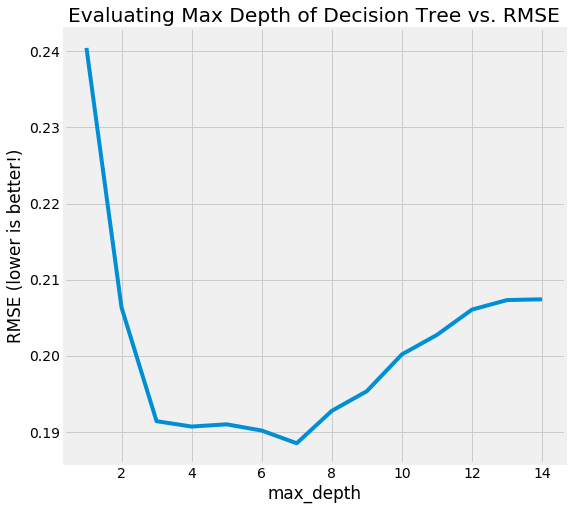

In [405]:
#Plot max_depth (x-axis) versus RMSE (y-axis)
plt.figure(figsize=(8,8))
plt.plot(max_depth_range, RMSE_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE (lower is better!)')
plt.title('Evaluating Max Depth of Decision Tree vs. RMSE')
plt.savefig('Evaluating Max Depth of Decision Tree vs. RMSE.png');

#Looks like the Max Depth for our Decision Tree should be around 6.
#Let's go with 6

In [406]:
#Now, let's do the same thing with the other MAJOR Hyperparameter, MAX_FEATURES!
#We'll Keep max_depth at 6. We have 24 Features, so let's set range(1,20)
max_features_range = range(1,27)

#list to store average RMSE for each value of max_features
RMSE_scores = []

# use LOOCV (Leave One Out Cross Validation) with each value of max_features
for feature in max_features_range:
    treereg = DecisionTreeRegressor(max_depth=6, max_features=feature, random_state=1)
    MSE_scores = cross_val_score(treereg, X, y, cv=10, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

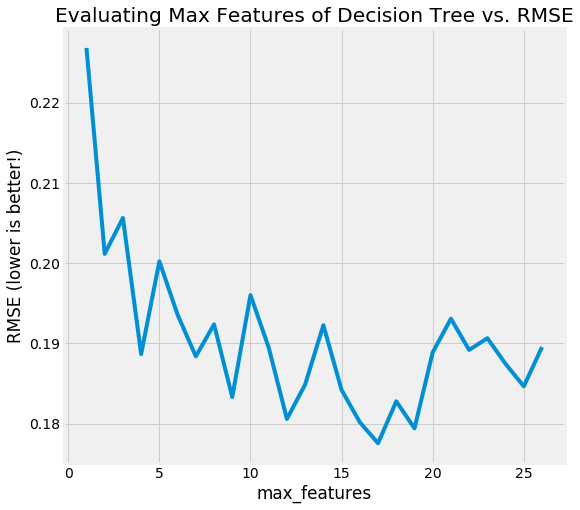

In [407]:
#Plot max_features (x-axis) versus RMSE (y-axis)
plt.figure(figsize=(8,8))
plt.plot(max_features_range, RMSE_scores)
plt.xlabel('max_features')
plt.ylabel('RMSE (lower is better!)')
plt.title('Evaluating Max Features of Decision Tree vs. RMSE')
plt.savefig('Evaluating Max Features of Decision Tree vs. RMSE.png');

#Looks like the Max Features for our Decision Tree should be around 16.
#Let's go with 16

In [408]:
#Max_depth = 7 and max_features = 18 was optimal, so we'll fit a tree using that parameter
#We're building the final model here using the 'correct' max_depth of the tree and other hyperparameters
treereg = DecisionTreeRegressor(max_depth=7, max_features=18, random_state=42)
treereg.fit(X, y)
scores = cross_val_score(treereg, X, y, cv=10, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

#The optimal Model using Hyperparameters of max_depth=5 & max_features=10 has RMSE of 0.1869

0.19252802536957692

In [409]:
pd.DataFrame({'feature':feature_cols, 'importance':treereg.feature_importances_}).sort_values('importance', ascending=False)
#It seems that the most important features are 'tier', 'social_eliteness', 'avgfacsal_2013', 'grad_rate' 

feature  importance
1                             tier_x    0.512369
23            social_eliteness_score    0.249940
14              hisp_share_fall_2000    0.056299
20                     pct_stem_2000    0.034364
26              rejection_rate_preds    0.025586
12  asian_or_pacific_share_fall_2000    0.025387
11              grad_rate_150_p_2013    0.022538
15                 pct_arthuman_2000    0.014442
9                     avgfacsal_2013    0.009177
7              ipeds_enrollment_2013    0.008723
25               sticker_price_preds    0.007958
16                 pct_business_2000    0.007277
5                  exp_instr_pc_2013    0.006454
21            pct_socialscience_2000    0.003811
10           scorecard_netprice_2013    0.003496
3                           region_x    0.003448
17                   pct_health_2000    0.002421
13             black_share_fall_2000    0.002063
4                            barrons    0.001359
22            pct_tradepersonal_2000    0.001289
18               pct_multidisci_2000    0.001103
19             pct_publicsocial_2000    0.000280
24                       tech_school    0.000216
8                             public    0.000000
6                               hbcu    0.000000
2                          iclevel_x    0.000000
0                             type_x    0.000000

# Check to see if SAT Scores is an Important Feature to include
Need to create a new DataFrame including SAT Scores without Null Values

In [410]:
#Check to see if SAT Scores is an Important Feature to include
#First, we need to create an entirely new dataframe including SAT Scores, but excluding Features with Null Values
feature_cols = [
'type_x',
'tier_x',
'iclevel_x',
'region_x',
'barrons',
'exp_instr_pc_2013',
'hbcu',
'ipeds_enrollment_2013',
'public', 
'avgfacsal_2013',
'scorecard_netprice_2013',
'grad_rate_150_p_2013',
'asian_or_pacific_share_fall_2000',
'black_share_fall_2000',
'hisp_share_fall_2000',
'pct_arthuman_2000',
'pct_business_2000',
'pct_health_2000',
'pct_multidisci_2000',
'pct_publicsocial_2000',
'pct_stem_2000',
'pct_socialscience_2000',
'pct_tradepersonal_2000',
'social_eliteness_score',
'tech_school',
'sticker_price_preds',
'rejection_rate_preds',
'sat_avg_2013',
'k_median_nozero_adjusted',               
'staircase_score',                        
'upward_mobility_score',                  
'downward_mobility_score',                
'shoots_and_ladders',                     
'sticker_price_preds',
]

sat_data = table[feature_cols]
print(sat_data.shape)
sat_data.head(3)

(2199, 34)


type_x  tier_x  iclevel_x  region_x  barrons  exp_instr_pc_2013  hbcu  \
0       3      11          2         1      999          3643.3179     0   
1       2       6          1         3        3          7046.2036     0   
2       1       7          1         3      999          3301.0461     0   

   ipeds_enrollment_2013  public  avgfacsal_2013         ...           \
0                   4711       0          4378.0         ...            
1                   3727       0          5508.0         ...            
2                   3394       1          4752.0         ...            

   tech_school  sticker_price_preds  rejection_rate_preds  sat_avg_2013  \
0            1              12298.0              0.174515           NaN   
1            0              29450.0              0.510600        1075.0   
2            0               3394.0              0.291000         925.0   

   k_median_nozero_adjusted  staircase_score  upward_mobility_score  \
0              17391.304348         0.495816               0.414779   
1              48630.887185        -0.248421               0.962966   
2              38815.789474         0.051642               0.580224   

   downward_mobility_score  shoots_and_ladders  sticker_price_preds  
0                -0.641118           -0.226339              12298.0  
1                -0.506532            0.456434              29450.0  
2                -0.498619            0.081605               3394.0  

[3 rows x 34 columns]

In [411]:
#Exclude the NaN Values
sat_notnull = sat_data[sat_data.sat_avg_2013.notnull()]
sat_notnull.shape
#This is a MUCH smaller dataframe, but let's see if it's helpful as an Important Feature

(954, 34)

In [412]:
#Build out a Decision Tree Regressor INCLUDING the SAT data. Use optimal max_depth and max_features hyperparameters
feature_cols = [
'type_x',
'tier_x',
'iclevel_x',
'region_x',
'barrons',
'exp_instr_pc_2013',
'hbcu',
'ipeds_enrollment_2013',
'public', 
'avgfacsal_2013',
'scorecard_netprice_2013',
'grad_rate_150_p_2013',
'asian_or_pacific_share_fall_2000',
'black_share_fall_2000',
'hisp_share_fall_2000',
'pct_arthuman_2000',
'pct_business_2000',
'pct_health_2000',
'pct_multidisci_2000',
'pct_publicsocial_2000',
'pct_stem_2000',
'pct_socialscience_2000',
'pct_tradepersonal_2000',
'sat_avg_2013',
'social_eliteness_score'
]

#We're excluding 'upward_mobility_score' in the feature_cols of course
X = sat_notnull[feature_cols]
y = sat_notnull['upward_mobility_score']

In [413]:
#Build Decision Tree with max_depth=5 and max_features=10
treereg = DecisionTreeRegressor(max_depth=7, max_features=18, random_state=42)
treereg.fit(X, y)
scores = cross_val_score(treereg, X, y, cv=5, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

0.20163767350120215

In [414]:
pd.DataFrame({'feature':feature_cols, 'importance':treereg.feature_importances_}).sort_values('importance', ascending=False)
#AHA! Here, we see that SAT Scores is not a predictive feature when looking across other features
#Graduation Rate and then Faculty Salary and Tier are actually the most important using Decision Trees

feature  importance
11              grad_rate_150_p_2013    0.456399
9                     avgfacsal_2013    0.228408
12  asian_or_pacific_share_fall_2000    0.042382
14              hisp_share_fall_2000    0.038506
20                     pct_stem_2000    0.037835
21            pct_socialscience_2000    0.037465
15                 pct_arthuman_2000    0.037270
19             pct_publicsocial_2000    0.029262
24            social_eliteness_score    0.017727
23                      sat_avg_2013    0.013988
4                            barrons    0.010513
17                   pct_health_2000    0.009307
5                  exp_instr_pc_2013    0.009227
8                             public    0.006752
18               pct_multidisci_2000    0.005281
13             black_share_fall_2000    0.004246
0                             type_x    0.003809
10           scorecard_netprice_2013    0.003428
7              ipeds_enrollment_2013    0.003225
22            pct_tradepersonal_2000    0.002380
16                 pct_business_2000    0.001357
1                             tier_x    0.000794
3                           region_x    0.000438
6                               hbcu    0.000000
2                          iclevel_x    0.000000

# Let's look at some Relationships of Features to Upward Mobility Score

Correlation is: 0.4008988134239777


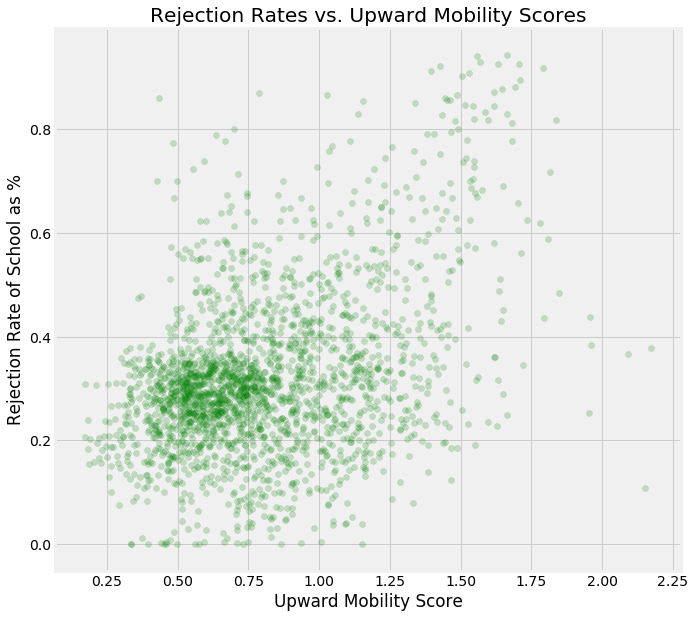

In [415]:
#Check out the relationship between Graduation Rates & Upward Mobility Score
plt.figure(figsize=(10,10))
plt.scatter(x=table['upward_mobility_score'], y=table['rejection_rate_preds'], alpha=0.2, color='green')
plt.ylabel('Rejection Rate of School as %')
plt.xlabel('Upward Mobility Score')
plt.title('Rejection Rates vs. Upward Mobility Scores')
plt.savefig('Rejection Rates vs. Upward Mobility Scores.png');
print("Correlation is:", table['upward_mobility_score'].corr(table['rejection_rate_preds']))

Correlation is: 0.6884356670869998


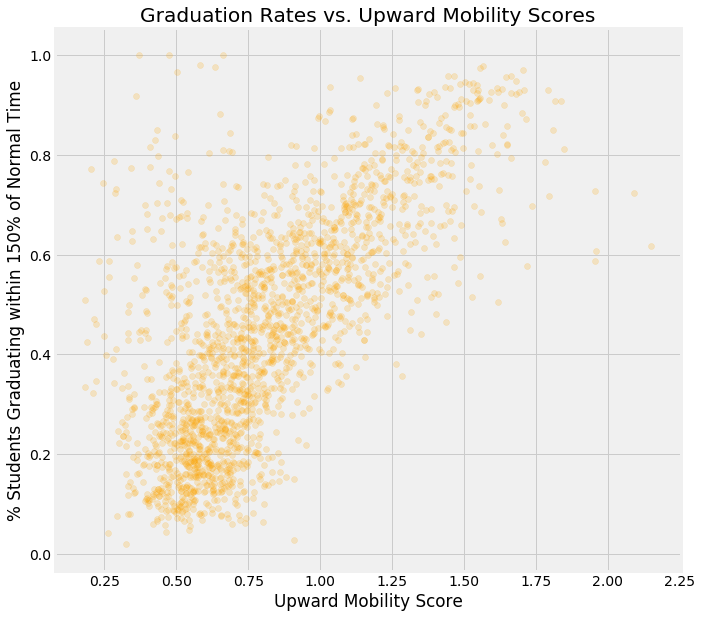

In [416]:
#Check out the relationship between Graduation Rates & Upward Mobility Score
plt.figure(figsize=(10,10))
plt.scatter(x=data['upward_mobility_score'], y=data['grad_rate_150_p_2013'], alpha=0.2, color='orange')
plt.ylabel('% Students Graduating within 150% of Normal Time')
plt.xlabel('Upward Mobility Score')
plt.title('Graduation Rates vs. Upward Mobility Scores')
plt.savefig('Graduation Rates vs. Upward Mobility Scores.png');
print("Correlation is:", data['upward_mobility_score'].corr(data['grad_rate_150_p_2013']))

Correlation is: 0.581398296770789


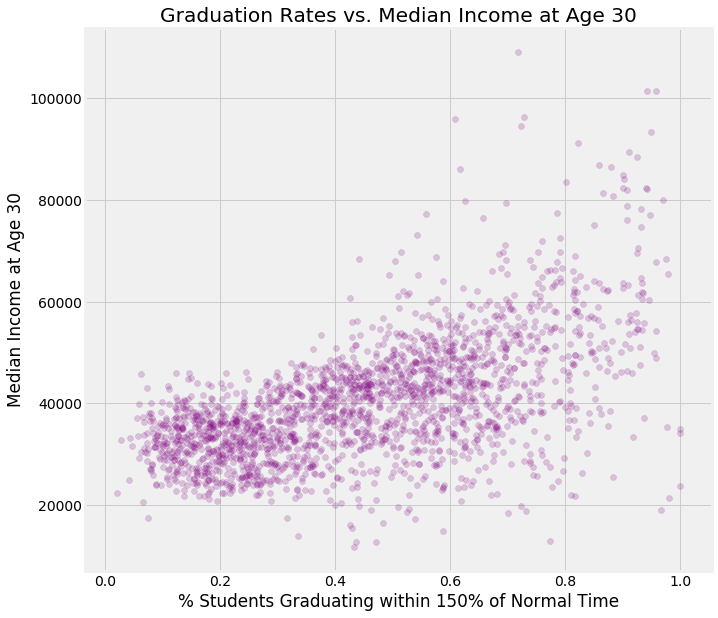

In [417]:
#Check out the relationship between Graduation Rates & Median Income (Student Age=30)
plt.figure(figsize=(10,10))
plt.scatter(x=data['grad_rate_150_p_2013'], y=data['k_median_nozero_adjusted'], alpha=0.2, color='purple')
plt.ylabel('Median Income at Age 30')
plt.xlabel('% Students Graduating within 150% of Normal Time')
plt.title('Graduation Rates vs. Median Income at Age 30')
plt.savefig('Graduation Rates vs. Median Income at Age 30.png');
print("Correlation is:", data['k_median_nozero_adjusted'].corr(data['grad_rate_150_p_2013']))

Correlation is: 0.34451306216268446


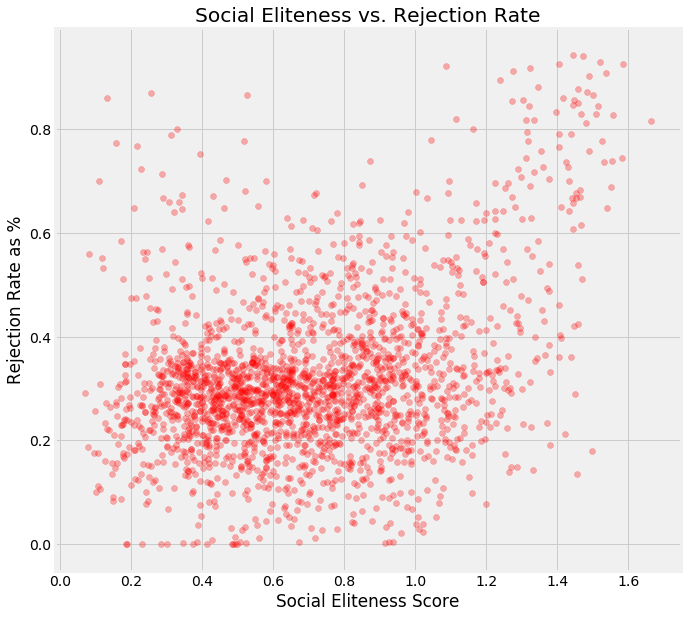

In [418]:
#Check out the relationship between Social Eliteness and Selectivity of the School
plt.figure(figsize=(10,10))
plt.scatter(x=table['social_eliteness_score'], y=table['rejection_rate_preds'], alpha=0.3, color='red')
plt.ylabel('Rejection Rate as %')
plt.xlabel('Social Eliteness Score')
plt.title('Social Eliteness vs. Rejection Rate')
plt.savefig('Social Eliteness vs. Rejection Rate.png');
print("Correlation is:", table['social_eliteness_score'].corr(table['rejection_rate_preds']))
#Interestingly, there's a large cluster of datapoints in Top, Right-hand corner.
#Perhaps these are the Tier 1 Ivy League Schools

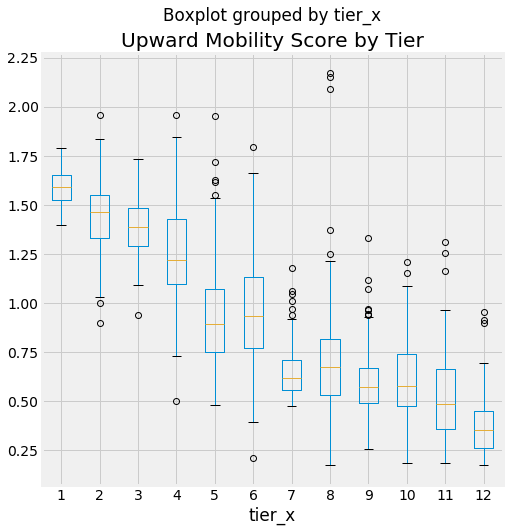

In [419]:
plt.rcParams['figure.figsize'] = [8, 8]
table.boxplot(column='upward_mobility_score', by='tier_x');
plt.title('Upward Mobility Score by Tier')
plt.savefig('Upward Mobility Score by Tier.png')
#Tier one schools (Ivy Plus) have the highest levels of mobility
#There's lots of Outliers in each tier, however

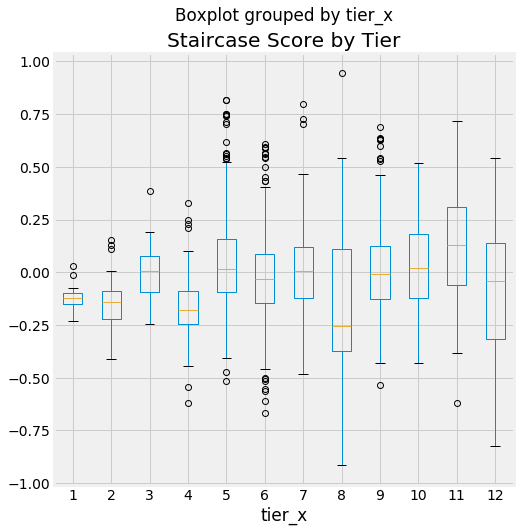

In [420]:
plt.rcParams['figure.figsize'] = [8, 8]
table.boxplot(column='staircase_score', by='tier_x');
plt.title('Staircase Score by Tier')
plt.savefig('Staircase Score by Tier.png')
#However, it looks wholly different if you look at the Simply Staircase score
#This takes into account the % of people in the top quintile falling to lower

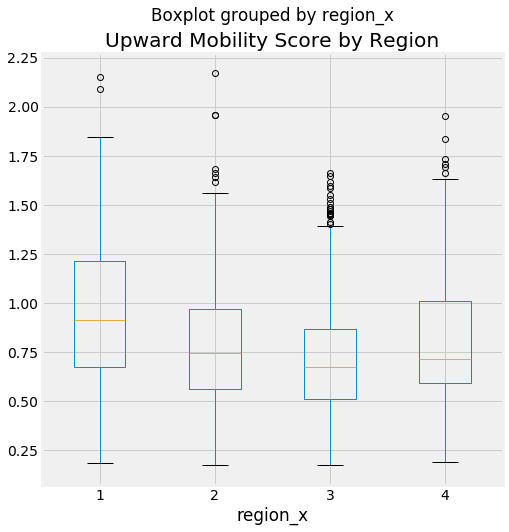

In [421]:
plt.rcParams['figure.figsize'] = [8, 8]
table.boxplot(column='upward_mobility_score', by='region_x');
plt.title('Upward Mobility Score by Region')
plt.savefig('Upward Mobility Score by Region.png')
#Northeast has a little higher Mobility Scores
#South is the lowest

Correlation is: 0.6120465301083637


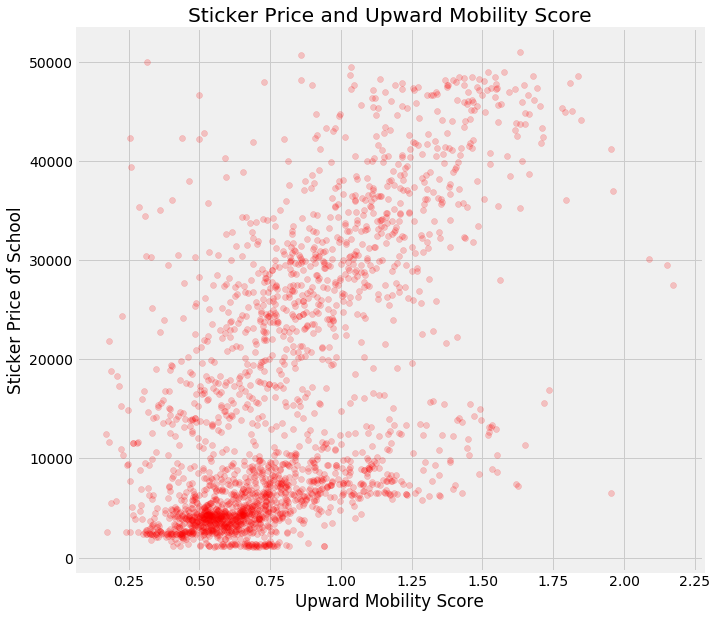

In [422]:
#Check out the relationship between Sticker Price of School & Upward Mobility Score
plt.figure(figsize=(10,10))
plt.style.use('fivethirtyeight')
plt.scatter(x=data['upward_mobility_score'], y=data['sticker_price_preds'], alpha=0.2, color='red')
plt.ylabel('Sticker Price of School')
plt.xlabel('Upward Mobility Score')
plt.title('Sticker Price and Upward Mobility Score')
plt.savefig('Scatter between Sticker Price of School & Upward Mobility Score.png');
print("Correlation is:", data['upward_mobility_score'].corr(data['sticker_price_preds']))
#You want to find schools that are on the Lower Right Hand side of this Quadrant.
#Let's search for schools that have Upward Mobility Score higher than 1.25 and Price Less than $30k

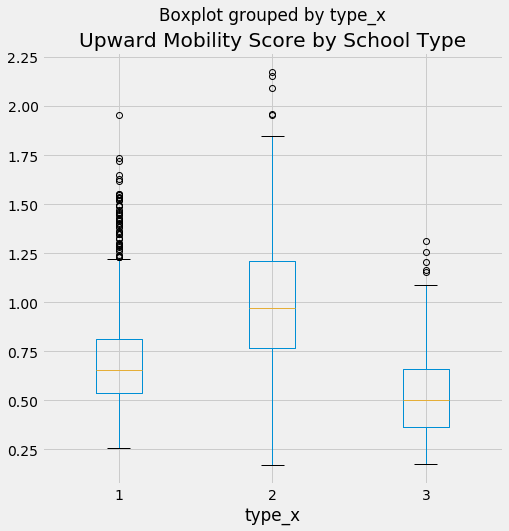

In [423]:
plt.rcParams['figure.figsize'] = [8, 8]
table.boxplot(column='upward_mobility_score', by='type_x');
plt.title('Upward Mobility Score by School Type')
plt.savefig('Upward Mobility Score by School Type.png')
#Private Non-Profit have the highest Mobility Scores on average
#You shouldn't be going to a For-Profit School

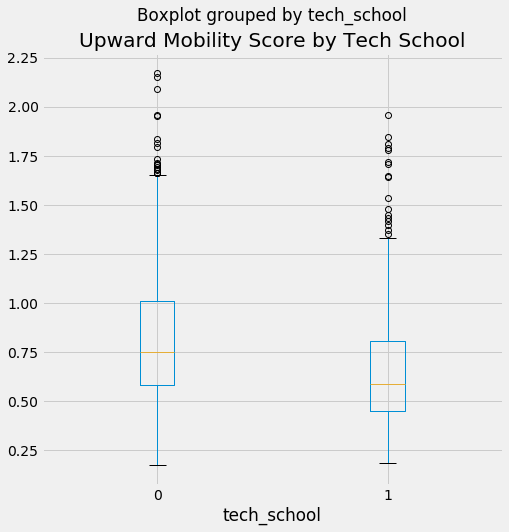

In [424]:
plt.rcParams['figure.figsize'] = [8, 8]
table.boxplot(column='upward_mobility_score', by='tech_school');
plt.title('Upward Mobility Score by Tech School')
plt.savefig('Upward Mobility Score by Tech School.png')
#This shows that Tech Schools doesn't necessarily equate to Upward Mobility, but there's a lot of them that fall as outliers

# Let's Run a Simple Linear Regression predicting Upward Mobility Rates
Use the selected Feature Columns as X-Variables

In [425]:
feature_cols = [
'type_x',
'tier_x',
'iclevel_x',
'region_x',
'barrons',
'exp_instr_pc_2013',
'hbcu',
'ipeds_enrollment_2013',
'public', 
'avgfacsal_2013',
'scorecard_netprice_2013',
'grad_rate_150_p_2013',
'asian_or_pacific_share_fall_2000',
'black_share_fall_2000',
'hisp_share_fall_2000',
'pct_arthuman_2000',
'pct_business_2000',
'pct_health_2000',
'pct_multidisci_2000',
'pct_publicsocial_2000',
'pct_stem_2000',
'pct_socialscience_2000',
'pct_tradepersonal_2000',
'social_eliteness_score',
'tech_school',
'sticker_price_preds',
'rejection_rate_preds'
]

In [426]:
#Building a LINEAR REGRESSION Model. Create X & y first
X = table[feature_cols]
y = table['upward_mobility_score']

# standardize the features
from sklearn.preprocessing import StandardScaler

#Scale the X Values
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)


C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()


In [427]:
# check that it standardized properly
print(X_scaled[:, 0].mean())
print(X_scaled[:, 0].std())
print(X_scaled[:, 1].mean())
print(X_scaled[:, 1].std())
print(X_scaled[:, 2].mean())
print(X_scaled[:, 2].std())
#The first 3 columns look to have a mean of 0 and StDev=1, which is expected

1.2278592068614738e-16
1.0000000000000002
7.754900253861939e-17
1.0
2.261845907376399e-16
1.0


In [428]:
#import, instantiate, fit
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_scaled, y)
pred = linreg.predict(X_scaled)

In [429]:
#Evaluating the Linear Regression Model - Comparing with Train/Test Splits & RMSE
#calculate metrics by hand
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42)

#Build the Model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

#get prediction
y_pred = linreg.predict(X_test)

#This is the prediction using all of the data & the model built on the train-test set
y_pred_2 = linreg.predict(X_scaled)
table['LinReg_Predict_UM_Score'] = y_pred_2

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [430]:
#print the coefficients
print(linreg.intercept_)
print(linreg.coef_)

0.8033677506933419
[-0.07666988  0.01177709 -0.04408742 -0.02857732 -0.05231798 -0.02114455
  0.00906469 -0.01045389 -0.02875271  0.03662878  0.0096757   0.05091452
  0.04458432 -0.01024125  0.04050474 -0.03874774  0.0049264   0.01466428
 -0.00312598 -0.01007367  0.05314723  0.00075721  0.01278145  0.12339448
 -0.00048715  0.03478711  0.0109231 ]


In [431]:
#Return RMSE Root Mean Squared Error for the Train-Test Split
print("LinReg RMSE for Train-Test Split:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("LinReg RMSE for entire dataset:", np.sqrt(metrics.mean_squared_error(y, pred)))
#We're going to keep this in mind when checking other Regression Models as a basis of comparison

LinReg RMSE for Train-Test Split: 0.15504506397368997
LinReg RMSE for entire dataset: 0.14912688430707222


# Let's Look at Ridge Regression to see if we can Improve these results

In [432]:
#Let's look at the full dataset first
from sklearn.linear_model import Ridge
ridgereg = Ridge(alpha=1, normalize=True)
ridgereg.fit(X, y)
pred = ridgereg.predict(X)


#We're using the same X_scaled and y
#Set up the Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=1)

# alpha=0 is equivalent to linear regression
#Here, we're looking at Ridge Regression
ridgereg = Ridge(alpha=1, normalize=True)
ridgereg.fit(X_train, y_train)
y_pred = ridgereg.predict(X_test)
print("The RMSE using RIDGE Regression with Train-Test-Split:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("RMSE using RIDGE for entire dataset:", np.sqrt(metrics.mean_squared_error(y, pred)))
#Note: The ‘normalize=True’ hyperparameter automatically converts your Features to standardized scaling so that you can accurately compare one Beta to another Beta.
#The RMSE using RIDGE Regression is: 

The RMSE using RIDGE Regression with Train-Test-Split: 0.17931549723228926
RMSE using RIDGE for entire dataset: 0.16688174090132118


In [433]:
#Check out how the Betas of the Feature Columns from RIDGE Regression change as you Tweak the Alpha
#Some of the features will be reduced down to Zero and thus eliminated
list(zip(feature_cols, ridgereg.coef_))


[('type_x', -0.00886315030543483),
 ('tier_x', -0.03422333621694022),
 ('iclevel_x', -0.022568662101648256),
 ('region_x', -0.013457700840066216),
 ('barrons', -0.028283617002758405),
 ('exp_instr_pc_2013', 0.0021445877555859656),
 ('hbcu', -0.004451054910664233),
 ('ipeds_enrollment_2013', 0.00594920710595961),
 ('public', -0.002344084625440661),
 ('avgfacsal_2013', 0.039381826780619925),
 ('scorecard_netprice_2013', 0.006259555154564357),
 ('grad_rate_150_p_2013', 0.031671745628206),
 ('asian_or_pacific_share_fall_2000', 0.02934270050835341),
 ('black_share_fall_2000', -0.01307094594315191),
 ('hisp_share_fall_2000', 0.010186133099893968),
 ('pct_arthuman_2000', -0.008182233162393773),
 ('pct_business_2000', 0.0022015348666442154),
 ('pct_health_2000', -0.009290340634218882),
 ('pct_multidisci_2000', -0.0068702458187220325),
 ('pct_publicsocial_2000', -0.01010543075728876),
 ('pct_stem_2000', 0.02606202592206942),
 ('pct_socialscience_2000', 0.012477650552886504),
 ('pct_tradepersona

In [434]:
#Let's look at the full dataset first
from sklearn.linear_model import Lasso
lassoreg = Lasso(alpha=1, normalize=True)
lassoreg.fit(X, y)
pred = lassoreg.predict(X)

#Let's look at LASSO Regression now (Import Lasso instead of Ridge)
from sklearn import metrics

lassoreg = Lasso(alpha=0.01, normalize=True)
lassoreg.fit(X_train, y_train)
y_pred = lassoreg.predict(X_test)
print("The RMSE using LASSO Regression with Train-Test-Split:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("RMSE using LASSO for entire dataset:", np.sqrt(metrics.mean_squared_error(y, pred)))

The RMSE using LASSO Regression with Train-Test-Split: 0.3300480879228811
RMSE using LASSO for entire dataset: 0.319828498563896


In [435]:
#Let's look at the important features from LASSO Regression
#Some of the features will be reduced down to Zero and thus eliminated
list(zip(feature_cols, lassoreg.coef_))
#pd.DataFrame({'Feature:', feature_cols, 'Coefficient:', lassoreg.coef_}).sort_values('Coefficient', ascending=False)

[('type_x', 0.0),
 ('tier_x', -0.0),
 ('iclevel_x', -0.0),
 ('region_x', -0.0),
 ('barrons', -0.0),
 ('exp_instr_pc_2013', 0.0),
 ('hbcu', -0.0),
 ('ipeds_enrollment_2013', 0.0),
 ('public', -0.0),
 ('avgfacsal_2013', 0.0),
 ('scorecard_netprice_2013', 0.0),
 ('grad_rate_150_p_2013', 0.0),
 ('asian_or_pacific_share_fall_2000', 0.0),
 ('black_share_fall_2000', -0.0),
 ('hisp_share_fall_2000', -0.0),
 ('pct_arthuman_2000', 0.0),
 ('pct_business_2000', -0.0),
 ('pct_health_2000', -0.0),
 ('pct_multidisci_2000', -0.0),
 ('pct_publicsocial_2000', -0.0),
 ('pct_stem_2000', 0.0),
 ('pct_socialscience_2000', 0.0),
 ('pct_tradepersonal_2000', -0.0),
 ('social_eliteness_score', 0.0),
 ('tech_school', -0.0),
 ('sticker_price_preds', 0.0),
 ('rejection_rate_preds', 0.0)]

# Which Major should a Student pursue if he's primarily interested in Mobility? 
Let's do a Decision Tree using just those variables (Majors) to found out

In [436]:
#Now, let's build a REGRESSION TREE using ONLY Majors to pursue
feature_cols = [
'pct_arthuman_2000',
'pct_business_2000',
'pct_health_2000',
'pct_multidisci_2000',
'pct_publicsocial_2000',
'pct_stem_2000',
'pct_socialscience_2000',
'pct_tradepersonal_2000',
]

X = table[feature_cols]
y = table['upward_mobility_score']

In [437]:
# instantiate a DecisionTreeRegressor 
from sklearn.tree import DecisionTreeRegressor
treereg = DecisionTreeRegressor(random_state=42)

#start train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#build out & fit Decision Tree Regression model
treereg.fit(X_train, y_train)

#get predictions
pred = treereg.predict(X_test)

#Evaluate the Model's RMSE
np.sqrt(metrics.mean_squared_error(pred, y_test))

#Using ONLY the Majors, this produces an RMSE when predicting Upward Mobility Score

0.3002534801865993

In [438]:
#Check out the Cross-Validation of multiple models
from sklearn.model_selection import cross_val_score
scores = cross_val_score(treereg, X, y, cv=10, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

0.31178412407567346

In [439]:
#Which Majors are important?
pd.DataFrame({'feature':feature_cols, 'importance':treereg.feature_importances_}).sort_values('importance', ascending=False)
#Intersetingly, Social Sciences comes out ahead!! With STEM a second and Humanities then Business

feature  importance
6  pct_socialscience_2000    0.350419
5           pct_stem_2000    0.218594
0       pct_arthuman_2000    0.122699
1       pct_business_2000    0.082969
2         pct_health_2000    0.070083
4   pct_publicsocial_2000    0.060568
3     pct_multidisci_2000    0.059318
7  pct_tradepersonal_2000    0.035350

Correlation is: 0.5096913942173468


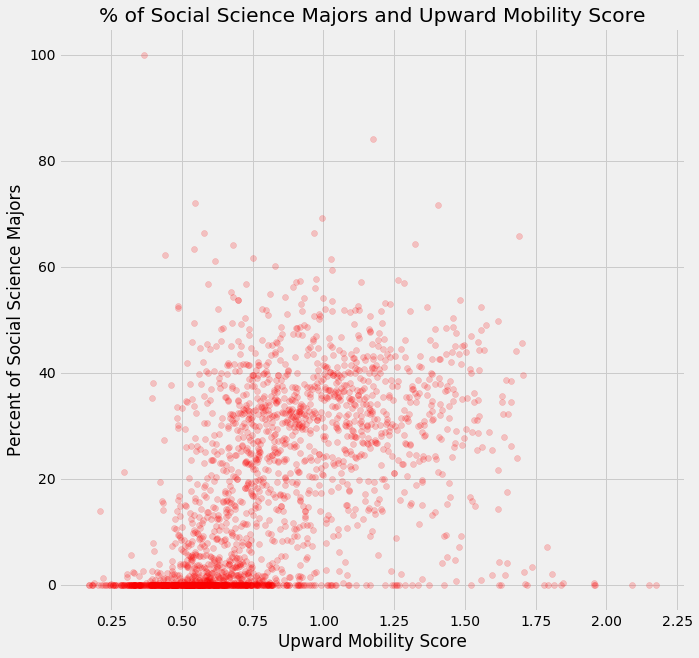

In [440]:
#Check out the relationship between Percent in Social Science Majors & Upward Mobility Score
plt.figure(figsize=(10,10))
plt.scatter(x=data['upward_mobility_score'], y=data['pct_socialscience_2000'], alpha=0.2, color='red')
plt.ylabel('Percent of Social Science Majors')
plt.xlabel('Upward Mobility Score')
plt.title('% of Social Science Majors and Upward Mobility Score')
plt.savefig('Scatter between % of Social Science Majors & Upward Mobility Score.png');
print("Correlation is:", data['upward_mobility_score'].corr(data['pct_socialscience_2000']) )

# Which of the Main Category Identifiers (Type, Barrons, Tier, etc) are most important in predicting Mobility Score?

In [441]:
#Now, let's build a Binary REGRESSION TREE using Category Identifiers
feature_cols = [
'type_x',
'tier_x',
'iclevel_x',
'region_x',
'barrons',
'exp_instr_pc_2013',
'hbcu',
'ipeds_enrollment_2013',
'public', 
'avgfacsal_2013',
'scorecard_netprice_2013',
'grad_rate_150_p_2013',
'asian_or_pacific_share_fall_2000',
'black_share_fall_2000',
'hisp_share_fall_2000',
'pct_arthuman_2000',
'pct_business_2000',
'pct_health_2000',
'pct_multidisci_2000',
'pct_publicsocial_2000',
'pct_stem_2000',
'pct_socialscience_2000',
'pct_tradepersonal_2000',
'social_eliteness_score',
'tech_school',
'sticker_price_preds',
'rejection_rate_preds'
]

X = table[feature_cols]
y = table['upward_mobility_score']

In [442]:
#Let's first scale the features to a z-score using Standard Scaler
from sklearn.preprocessing import StandardScaler

# instantiate a DecisionTreeRegressor 
from sklearn.tree import DecisionTreeRegressor
treereg = DecisionTreeRegressor(random_state=42)

#start train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#standardize X_train
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

#Standardiz X_test
X_test_scaled = scaler.transform(X_test)

#build out & fit Decision Tree Regression model
treereg.fit(X_train_scaled, y_train)

#get predictions
pred = treereg.predict(X_test_scaled)

#Evaluate the Model's RMSE
print("RMSE using Decision Tree Regression Train-test-split:", np.sqrt(metrics.mean_squared_error(pred, y_test)))

#Using these Major Category Identifiers produces a better RMSE than looking at Majors

RMSE using Decision Tree Regression Train-test-split: 0.2202212611246258


C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  
C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.


In [443]:
#Which Majors are important?
pd.DataFrame({'feature':feature_cols, 'importance':treereg.feature_importances_}).sort_values('importance', ascending=False)
#Intersetingly, when isolating to just these, Barrons Selectivity is the best identifier followed by ipeds_enrollment. 
#This indicates that Applicants inherently KNOW that the schools have high Mobility Scores and the schools themselves can be more selective
#Strangely, tier - which was near the top in the overall categories - dropped to 3rd

feature  importance
4                            barrons    0.488770
9                     avgfacsal_2013    0.129801
11              grad_rate_150_p_2013    0.064641
23            social_eliteness_score    0.061105
20                     pct_stem_2000    0.035837
14              hisp_share_fall_2000    0.032057
12  asian_or_pacific_share_fall_2000    0.027961
17                   pct_health_2000    0.021711
25               sticker_price_preds    0.018292
5                  exp_instr_pc_2013    0.016061
15                 pct_arthuman_2000    0.015501
21            pct_socialscience_2000    0.015289
7              ipeds_enrollment_2013    0.013412
13             black_share_fall_2000    0.012043
10           scorecard_netprice_2013    0.011466
18               pct_multidisci_2000    0.009249
26              rejection_rate_preds    0.007912
16                 pct_business_2000    0.005673
19             pct_publicsocial_2000    0.004616
3                           region_x    0.003056
22            pct_tradepersonal_2000    0.002409
1                             tier_x    0.001269
24                       tech_school    0.001057
2                          iclevel_x    0.000469
6                               hbcu    0.000197
8                             public    0.000112
0                             type_x    0.000035

Correlation is: -0.6666942742673011


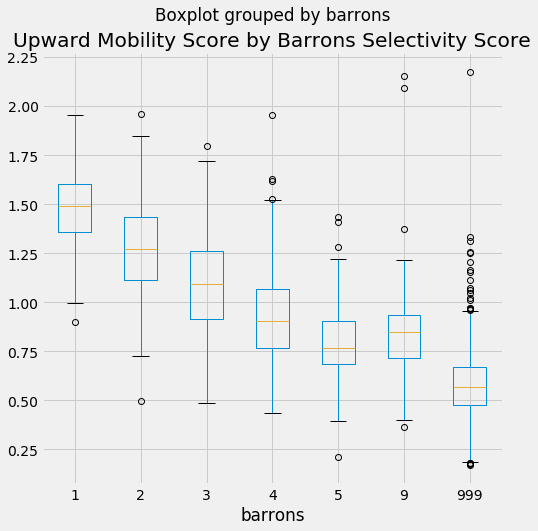

In [444]:
#Let's Revisit this Barrons feature to visualize its relationship with Upward Mobility
plt.rcParams['figure.figsize'] = [8, 8]
plt.style.use('fivethirtyeight')
table.boxplot(column='upward_mobility_score', by='barrons');
plt.title('Upward Mobility Score by Barrons Selectivity Score')
plt.savefig('Upward Mobility Score by Barrons Selectivity.png')
#Barrons shows the selectivity of the school with 1 = Most Selective, 5 = Least Selective
print("Correlation is:", table['upward_mobility_score'].corr(table['barrons']))

# Let's create 5 'Upward Mobility Buckets' 
Split data into 5 distinct categories based on Upward Mobility Score.  This will be used for Classification purposes so that we can run Classification Models

In [445]:
#Let's first get an idea of the distribution of the Upward Mobility Score data
print(table['upward_mobility_score'].describe())
print("Median:", table['upward_mobility_score'].median())

count    2199.000000
mean        0.803484
std         0.319901
min         0.171420
25%         0.564913
50%         0.735896
75%         0.998156
max         2.173745
Name: upward_mobility_score, dtype: float64
Median: 0.7358958170833334


In [446]:
#Create Buckets of Upward Mobility Scores
table['upward_mobility_bucket'] = pd.cut(table.upward_mobility_score,
                                        bins=[0, 0.5, 0.7, 1.0, 1.3, 2.5],
                                        labels=['Worst', 'Below Average', 'Medium', 'Good', 'Best'],
                                        include_lowest=True)

#Chose these cut-offs to achieve a Bell-Curve Distribution

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [447]:
#Here, we are transforming the Text-based strings into integers corresponding to upward mobility bucket
table['um_bucket_level'] = table['upward_mobility_bucket'].map({'Worst':1, 'Below Average': 2, 'Medium':3, 'Good':4, 'Best':5})

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [448]:
table['um_bucket_level'].value_counts()
#Originally, used this Mapping: map({'Poor':1, 'Medium':2, 'Good':3, 'Best':4})
#looks like there's too many '2's.  Let's Re-Map to include 5 buckets to get a more granular perspective of buckets
#This is a fairly decent distribution with the smallest columns being 1 (Poor) and 5 (Best)

3    673
2    648
4    357
1    330
5    191
Name: um_bucket_level, dtype: int64

# Now, we can perform Categorical Classification Techniques using Logistic Regression & Other Classifiation Models

In [449]:
#Build Logistic Regression Model to Predict the Bucket
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
feature_cols =[
'type_x',
'tier_x',
'iclevel_x',
'region_x',
'barrons',
'exp_instr_pc_2013',
'hbcu',
'ipeds_enrollment_2013',
'public', 
'avgfacsal_2013',
'scorecard_netprice_2013',
'grad_rate_150_p_2013',
'asian_or_pacific_share_fall_2000',
'black_share_fall_2000',
'hisp_share_fall_2000',
'pct_arthuman_2000',
'pct_business_2000',
'pct_health_2000',
'pct_multidisci_2000',
'pct_publicsocial_2000',
'pct_stem_2000',
'pct_socialscience_2000',
'pct_tradepersonal_2000',
'social_eliteness_score',
'tech_school',
'sticker_price_preds',
'rejection_rate_preds' 
]

X = table[feature_cols]
y = table['um_bucket_level']

In [450]:
# standardize the features
from sklearn.preprocessing import StandardScaler

#Scale the X Values
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  import sys


In [451]:
# check that it standardized properly
print(X_scaled[:, 0].mean())
print(X_scaled[:, 0].std())
print(X_scaled[:, 1].mean())
print(X_scaled[:, 1].std())
#The first 2 columns look to have a mean of 0 and StDev=1, which is expected

1.2278592068614738e-16
1.0000000000000002
7.754900253861939e-17
1.0


In [452]:
#Here, we're running the model on the entire dataframe
#fit Model
logreg.fit(X_scaled, y)

# store prediction as a new column in dataframe (This is using ALL Data)
y_pred_class = logreg.predict(X_scaled)
table['um_bucket_pred_class'] = logreg.predict(X_scaled)

C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [453]:
# Split X and y into training and testing sets (using random_state for reproducibility)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42)

#Build the Model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

#Get the prediction using the trained model
y_pred = logreg.predict(X_test)

#store the predicted response values as new column in dataframe using trained model
pred = logreg.predict(X_scaled)
table['LogReg_Predicted_Class'] = pred

#Store the predicted probabilities into a class
table['um_bucket_pred_proba_class1'] = logreg.predict_proba(X_scaled)[:,0]
table['um_bucket_pred_proba_class2'] = logreg.predict_proba(X_scaled)[:,1]
table['um_bucket_pred_proba_class3'] = logreg.predict_proba(X_scaled)[:,2]
table['um_bucket_pred_proba_class4'] = logreg.predict_proba(X_scaled)[:,3]
table['um_bucket_pred_proba_class5'] = logreg.predict_proba(X_scaled)[:,4]
#The higher the probability, the higher the chance it lands in the 'best' class of 0

C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [454]:
#Array computes the probability likelihood that it falls in each class
y_pred_proba = logreg.predict_proba(X_scaled)
y_pred_proba

array([[3.40481534e-01, 4.59126953e-01, 1.94094087e-01, 4.67184119e-04,
        5.83024189e-03],
       [5.89290390e-03, 1.25362385e-01, 5.02619158e-01, 3.52619032e-01,
        1.35065207e-02],
       [4.33147139e-02, 7.07078022e-01, 2.28603624e-01, 2.05641502e-02,
        4.39489787e-04],
       ...,
       [4.44370880e-03, 2.29116935e-01, 6.58555284e-01, 1.05238414e-01,
        2.64565796e-03],
       [2.09300201e-01, 5.99205380e-01, 1.88854982e-01, 2.14660524e-03,
        4.92831775e-04],
       [4.12884853e-01, 4.88831081e-01, 9.65793460e-02, 1.18690697e-03,
        5.17812696e-04]])

In [455]:
#Check out Cross-Validation of Decision Tree Model across 10 different Train-Test splits
from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X_scaled, y, cv=10, scoring='accuracy')

print('The cross_val scores using LogReg are: {}'.format(scores), '\n')
print('The mean of the cross_val scores is: {}'.format(scores.mean()))
#This Decision Tree Model an Accurate Model with 62.7% Accuracy of predicting the correct 'Upward Mobility Bucket'!

C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default so

The cross_val scores using LogReg are: [0.61711712 0.62895928 0.61085973 0.64545455 0.66363636 0.60454545
 0.61363636 0.63926941 0.63302752 0.61009174] 

The mean of the cross_val scores is: 0.6266597521362473


In [456]:
#Compare this Accuracy score versus the Null Accuracy score
print(y.value_counts())
y.value_counts().head(1)/len(y)
#62.7% is quite an improvement from 30.6%!

3    673
2    648
4    357
1    330
5    191
Name: um_bucket_level, dtype: int64


3    0.306048
Name: um_bucket_level, dtype: float64

In [457]:
#Let's look at the Confusion Matrix - Using ALL Data
metrics.confusion_matrix(y,y_pred_class)
#Fairly decent job of predicting the right class with the exception of Class_4

array([[194, 122,  13,   1,   0],
       [ 54, 481, 109,   4,   0],
       [ 19, 162, 449,  41,   2],
       [  4,   5, 160, 157,  31],
       [  0,   1,  12,  51, 127]], dtype=int64)

In [458]:
#Let's look at the Confusion Matrix - Using just Testing Data
metrics.confusion_matrix(y_test, y_pred)

array([[ 48,  37,   7,   0,   0],
       [ 11, 122,  25,   5,   0],
       [  8,  40, 105,  14,   0],
       [  2,   0,  41,  36,   5],
       [  0,   0,   3,  12,  29]], dtype=int64)

In [459]:
# RECALL
print("Recall Score by Class:", metrics.recall_score(y, y_pred_class,  average=None))

# PRECISION
#This will return the total ratio of tp/(tp + fp)
print("Total Ratio of TP/(TP+FP) precision:", metrics.precision_score(y, y_pred_class, average='micro'))

#This will return the Precision Score for Each Class
print("Precision Score for Each Class:", metrics.precision_score(y, y_pred_class, average=None))

# F1 Score
print("F1 Score by Class:", metrics.f1_score(y, y_pred_class, average=None))

Recall Score by Class: [0.58787879 0.74228395 0.66716196 0.43977591 0.66492147]
Total Ratio of TP/(TP+FP) precision: 0.6402910413824465
Precision Score for Each Class: [0.71586716 0.62386511 0.60430686 0.61811024 0.79375   ]
F1 Score by Class: [0.64559068 0.67794221 0.63418079 0.51391162 0.72364672]


In [460]:
#Let's see these Evaluation Metrics on just the Testing Data
# RECALL
print("Recall Score by Class:", metrics.recall_score(y_test, y_pred,  average=None))

# PRECISION
#This will return the total ratio of tp/(tp + fp)
print("Total Ratio of TP/(TP+FP) precision:", metrics.precision_score(y_test, y_pred, average='micro'))

#This will return the Precision Score for Each Class
print("Precision Score for Each Class:", metrics.precision_score(y_test, y_pred, average=None))

# F1 Score
print("F1 Score by Class:", metrics.f1_score(y_test, y_pred, average=None))

Recall Score by Class: [0.52173913 0.74846626 0.62874251 0.42857143 0.65909091]
Total Ratio of TP/(TP+FP) precision: 0.6181818181818182
Precision Score for Each Class: [0.69565217 0.61306533 0.5801105  0.53731343 0.85294118]
F1 Score by Class: [0.59627329 0.67403315 0.60344828 0.47682119 0.74358974]


# We've now Established a Preliminary Model of Predicting the Correct Upward Mobility Bucket Class. Let's Explore Other Classification Models to see if we can improve
Let's start with KNN Classification

In [461]:
#Let's build a KNN Model with (K=10)
#imoprt class & library for KNearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=25)

feature_cols =[
'type_x',
'tier_x',
'iclevel_x',
'region_x',
'barrons',
'exp_instr_pc_2013',
'hbcu',
'ipeds_enrollment_2013',
'public', 
'avgfacsal_2013',
'scorecard_netprice_2013',
'grad_rate_150_p_2013',
'asian_or_pacific_share_fall_2000',
'black_share_fall_2000',
'hisp_share_fall_2000',
'pct_arthuman_2000',
'pct_business_2000',
'pct_health_2000',
'pct_multidisci_2000',
'pct_publicsocial_2000',
'pct_stem_2000',
'pct_socialscience_2000',
'pct_tradepersonal_2000',
'social_eliteness_score',
'tech_school',
'sticker_price_preds',
'rejection_rate_preds' 
]

X = table[feature_cols]
y = table['um_bucket_level']

In [462]:
# standardize the features
from sklearn.preprocessing import StandardScaler

#Scale the X Values
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# check that it standardized properly
print(X_scaled[:, 0].mean())
print(X_scaled[:, 0].std())
print(X_scaled[:, 1].mean())
print(X_scaled[:, 1].std())
#The first 2 columns look to have a mean of 0 and StDev=1, which is expected

1.2278592068614738e-16
1.0000000000000002
7.754900253861939e-17
1.0


C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  import sys


In [463]:
#vuelva
#fit with data
knn.fit(X_scaled,y)

#store the predicted response values as new column in dataframe
y_pred_class = knn.predict(X_scaled)
table['um_bucket_pred_class_knn'] = y_pred_class

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [464]:
# Split X and y into training and testing sets (using random_state for reproducibility)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42)

#Build the Model
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train, y_train)

#Get the prediction using the trained model
y_pred = knn.predict(X_test)

#store the predicted response values as new column in dataframe using trained model
pred = knn.predict(X_scaled)
table['KNN_Predicted_Class'] = pred

#Store the predicted probabilities into a class
y_pred_proba = knn.predict_proba(X_scaled)
table['um_bucket_pred_proba_knn_class1'] = knn.predict_proba(X_scaled)[:,0]
table['um_bucket_pred_proba_knn_class2'] = knn.predict_proba(X_scaled)[:,1]
table['um_bucket_pred_proba_knn_class3'] = knn.predict_proba(X_scaled)[:,2]
table['um_bucket_pred_proba_knn_class4'] = knn.predict_proba(X_scaled)[:,3]
table['um_bucket_pred_proba_knn_class5'] = knn.predict_proba(X_scaled)[:,4]


C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#ind

In [465]:
#compute classifcation accuracy score - looking at the Train-Test Split
from sklearn import metrics
print("Accuracy using KNN Classification:", metrics.accuracy_score(y_test, y_pred))
#This has a decent accuracy of 63.8% correct using Optimal Value of K=25

Accuracy using KNN Classification: 0.6145454545454545


In [466]:
#compute classifcation accuracy score - looking at ALL Data (Incorrect)
from sklearn import metrics
print("Accuracy using KNN Classification:", metrics.accuracy_score(y, y_pred_class))
#This has a decent accuracy of 63.8% correct using Optimal Value of K=25

Accuracy using KNN Classification: 0.6389267849022283


In [467]:
#However wait, how do we know the optimal value of K? Moreover, how can we account for the Testing Accuracy?
#Let's first examine the Null Accuracy (accuracy that could be achieved by always predicting the most frequent class)
#Examine the class distribution
print(y.value_counts())
y.value_counts().head(1)/len(y)
#This shows that you'd be 30.6% Accurate if you simply predicted the "3" Medium Class every single time
#There are 673 "Medium Schools" out of the 2199 distribution. This is the score we need to beat

3    673
2    648
4    357
1    330
5    191
Name: um_bucket_level, dtype: int64


3    0.306048
Name: um_bucket_level, dtype: float64

In [468]:
#Let's search for the "best" value of K
# calculate TRAINING ERROR and TESTING ERROR for K=1 through 100

# Split X and y into training and testing sets (using random_state for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42)

#Lets Define a Function

k_range = range(1,101)
training_error = []
testing_error = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Calculate the Training Error
    knn.fit(X_scaled,y)
    y_pred_class = knn.predict(X_scaled)
    training_accuracy = metrics.accuracy_score(y, y_pred_class)
    training_error.append(1-training_accuracy)
    
    #calculate the Testing Error
    knn.fit(X_train, y_train)
    y_pred_class_test = knn.predict(X_test)
    testing_accuracy = metrics.accuracy_score(y_test, y_pred_class_test)
    testing_error.append(1 - testing_accuracy)
    

In [469]:
#Set up notebook for plots
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

#Create a DataFrame of K, training error, and testing error
#Create an entirely new dataframe (Error_df) to view these errors with only the Error data inside
column_dict = {'K':k_range, 'Training Error':training_error, 'Testing Error':testing_error}
error_df = pd.DataFrame(column_dict).set_index('K').sort_index(ascending=False)
error_df.head()

#The Training Error is our Error rate of "in-sample" whereas our Testing Error is our "out-of-sample" result

Training Error  Testing Error
K                                 
100        0.415643       0.456364
99         0.415643       0.460000
98         0.417917       0.460000
97         0.415643       0.460000
96         0.414734       0.461818

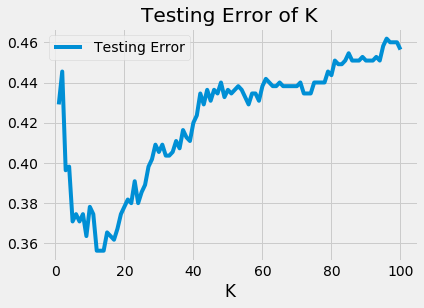

In [470]:
# plot the relationship between K (HIGH TO LOW) and TESTING ERROR
#Note: We want to pick a K that is near the very bottom of the Testing Data
error_df.plot(y='Testing Error')
plt.title('Testing Error of K')
plt.savefig('Testing Error of K.png');
#Here, it looks like the appropriate value of K is 20

    Training Error  Testing Error
K                                
12        0.317872       0.356364
13        0.319691       0.356364
14        0.326512       0.356364
17        0.335607       0.361818
9         0.314688       0.363636


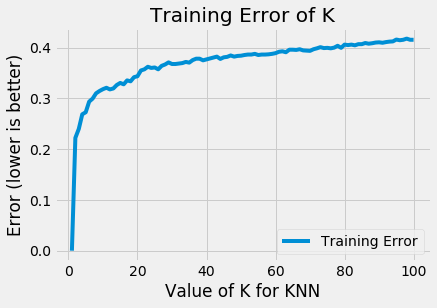

In [471]:
# plot the relationship between K (HIGH TO LOW) and TRAINING ERROR
#We want to pick the lowest value of K without overfitting the dataset
error_df.plot(y='Training Error')
plt.xlabel('Value of K for KNN')
plt.ylabel('Error (lower is better)')
plt.title('Training Error of K')
plt.savefig('Training Error of K.png');

# find the minimum testing error and the associated K value
#Sort the values in order to see what the most appropriate K to use is.
print(error_df.sort_values('Testing Error').head())
#Looks like that minimum training error is at K=23

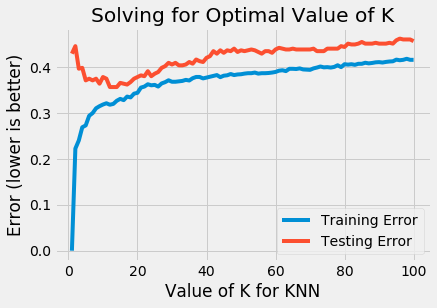

In [472]:
# Finally, we plot the relationship between K (HIGH TO LOW) and both TRAINING ERROR and TESTING ERROR
error_df.plot()
plt.xlabel('Value of K for KNN')
plt.ylabel('Error (lower is better)')
plt.title('Solving for Optimal Value of K')
plt.savefig('Solving for Optimal Value of K.png');

In [473]:
#Check out Cross-Validation of KNN Model across 10 different Train-Test splits
from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn, X_scaled, y, cv=10, scoring='accuracy')

print('The cross_val scores are: {}'.format(scores), '\n')
print('The mean of the cross_val scores is: {}'.format(scores.mean()))
#This KNN Model is an Accurate Model with 61.1% Accuracy of predicting the correct 'Upward Mobility Bucket'!

The cross_val scores are: [0.56756757 0.59276018 0.60633484 0.55       0.61363636 0.55
 0.55454545 0.57990868 0.5733945  0.55504587] 

The mean of the cross_val scores is: 0.5743193451145384


In [474]:
#Let's look at the Confusion Matrix, which shows which ones we've predicted accurately and which weren't
metrics.confusion_matrix(y,y_pred_class)
#This is saying that Class 1 does a pretty terrible job as it doesn't correctly predict any in class 1
#Class one is often confused with class 2 (0 vs 101)
#Try to look for a way to change that

array([[153, 133,  42,   1,   1],
       [ 37, 440, 169,   2,   0],
       [ 19, 140, 469,  45,   0],
       [  3,   5, 188, 145,  16],
       [  1,   1,  23,  88,  78]], dtype=int64)

In [475]:
#Let's look at the Confusion Matrix on just the train-test-split
metrics.confusion_matrix(y_test,y_pred)

array([[ 45,  39,   7,   0,   1],
       [  7, 120,  36,   0,   0],
       [  6,  38, 106,  17,   0],
       [  1,   0,  37,  43,   3],
       [  0,   0,   5,  15,  24]], dtype=int64)

In [476]:
# RECALL
print("Recall Score by Class:", metrics.recall_score(y, y_pred_class,  average=None))

# PRECISION
#This will return the total ratio of tp/(tp + fp)
print("Total Ratio of TP/(TP+FP) precision:", metrics.precision_score(y, y_pred_class, average='micro'))

#This will return the Precision Score for Each Class
print("Precision Score for Each Class:", metrics.precision_score(y, y_pred_class, average=None))

# F1 Score
print("F1 Score by Class:", metrics.f1_score(y, y_pred_class, average=None))

Recall Score by Class: [0.46363636 0.67901235 0.69687964 0.40616246 0.40837696]
Total Ratio of TP/(TP+FP) precision: 0.584356525693497
Precision Score for Each Class: [0.71830986 0.61196106 0.52637486 0.51601423 0.82105263]
F1 Score by Class: [0.56353591 0.64374543 0.59974425 0.45454545 0.54545455]


In [477]:
# RECALL
print("Recall Score by Class:", metrics.recall_score(y_test, y_pred,  average=None))

# PRECISION
#This will return the total ratio of tp/(tp + fp)
print("Total Ratio of TP/(TP+FP) precision:", metrics.precision_score(y_test, y_pred, average='micro'))

#This will return the Precision Score for Each Class
print("Precision Score for Each Class:", metrics.precision_score(y_test, y_pred, average=None))

# F1 Score
print("F1 Score by Class:", metrics.f1_score(y_test, y_pred, average=None))

Recall Score by Class: [0.48913043 0.73619632 0.63473054 0.51190476 0.54545455]
Total Ratio of TP/(TP+FP) precision: 0.6145454545454545
Precision Score for Each Class: [0.76271186 0.60913706 0.55497382 0.57333333 0.85714286]
F1 Score by Class: [0.59602649 0.66666667 0.59217877 0.5408805  0.66666667]


In [478]:
table.head(3)
#Looking at the results, there are some that predict very poor UM score (1), but in actuality, they're the Best (4)
#The Advanced Institute of Hair Design is one of them.
#How do we interpret these Probabilities because they're not making much sense when we have 4 different classes.

super_opeid                                           name_x  type_x  \
0        30955  ASA Institute Of Business & Computer Technology       3   
1         3537                     Abilene Christian University       2   
2         1541             Abraham Baldwin Agricultural College       1   

   tier_x  iclevel_x  region_x  barrons  exp_instr_pc_2013  hbcu  \
0      11          2         1      999          3643.3179     0   
1       6          1         3        3          7046.2036     0   
2       7          1         3      999          3301.0461     0   

   ipeds_enrollment_2013               ...                 \
0                   4711               ...                  
1                   3727               ...                  
2                   3394               ...                  

   um_bucket_pred_proba_class3  um_bucket_pred_proba_class4  \
0                     0.194094                     0.000467   
1                     0.502619                     0.352619   
2                     0.228604                     0.020564   

   um_bucket_pred_proba_class5  um_bucket_pred_class_knn  KNN_Predicted_Class  \
0                     0.005830                         2                    2   
1                     0.013507                         3                    3   
2                     0.000439                         2                    2   

   um_bucket_pred_proba_knn_class1  um_bucket_pred_proba_knn_class2  \
0                              0.2                             0.40   
1                              0.0                             0.08   
2                              0.0                             0.88   

   um_bucket_pred_proba_knn_class3 um_bucket_pred_proba_knn_class4  \
0                             0.28                            0.04   
1                             0.64                            0.28   
2                             0.08                            0.04   

   um_bucket_pred_proba_knn_class5  
0                             0.08  
1                             0.00  
2                             0.00  

[3 rows x 57 columns]

# Let's see what the result would be if we use GridSearch to Optimize the Hyperparameters

In [479]:
#import Library
from sklearn.model_selection import GridSearchCV

# define the parameter values that should be searched
k_range = list(range(10, 30))
print(k_range)

# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)
print(param_grid)

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
{'n_neighbors': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]}


In [480]:
#Call in the Model you’d like to run the Parameter grid through. Warning: SLOW!
knn = KNeighborsClassifier()

# instantiate the grid. This is just like a Cross-Validation split
#notice that we don't put in x, y.  We're not fitting the data here.
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=True)

# fit the grid with data
grid.fit(X_scaled, y)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [481]:
# view the complete results (list of named tuples)
pd.DataFrame(grid.cv_results_).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.0048      0.001600         0.031702        0.006420   
1         0.0038      0.000400         0.027102        0.000831   
2         0.0045      0.001025         0.030802        0.005212   
3         0.0042      0.000600         0.027902        0.001814   
4         0.0039      0.000300         0.028002        0.000447   

  param_n_neighbors               params  split0_test_score  \
0                10  {'n_neighbors': 10}           0.585586   
1                11  {'n_neighbors': 11}           0.585586   
2                12  {'n_neighbors': 12}           0.608108   
3                13  {'n_neighbors': 13}           0.590090   
4                14  {'n_neighbors': 14}           0.590090   

   split1_test_score  split2_test_score  split3_test_score       ...         \
0           0.628959           0.615385           0.618182       ...          
1           0.633484           0.619910           0.650000       ...          
2           0.610860           0.615385           0.622727       ...          
3           0.638009           0.597285           0.631818       ...          
4           0.619910           0.624434           0.613636       ...          

   split2_train_score  split3_train_score  split4_train_score  \
0            0.688574            0.676604            0.679636   
1            0.688069            0.671551            0.682668   
2            0.684024            0.683173            0.679636   
3            0.681496            0.670541            0.677110   
4            0.679474            0.665993            0.669530   

   split5_train_score  split6_train_score  split7_train_score  \
0            0.679131            0.681152            0.676768   
1            0.681152            0.680647            0.677778   
2            0.677110            0.670035            0.674242   
3            0.675088            0.670035            0.674242   
4            0.667004            0.669530            0.667172   

   split8_train_score  split9_train_score  mean_train_score  std_train_score  
0            0.683998            0.688036          0.682432         0.004165  
1            0.677436            0.680464          0.681018         0.004523  
2            0.680969            0.687532          0.680714         0.005261  
3            0.670369            0.681474          0.676319         0.004735  
4            0.666330            0.672388          0.671520         0.005282  

[5 rows x 31 columns]

In [482]:
# examine the first tuple
print(grid.cv_results_['params'][0])
print(grid.cv_results_['mean_test_score'][0])

# create a list of the mean scores only
grid_mean_scores = [result for result in grid.cv_results_['mean_test_score']]
print(grid_mean_scores)

#GridSearch would have used 10 Nearest Neighbors and 51.97% Accuracy

{'n_neighbors': 10}
0.6125511596180082
[0.6125511596180082, 0.6161891768985903, 0.6134606639381537, 0.6116416552978626, 0.6125511596180082, 0.6139154160982264, 0.6139154160982264, 0.6120964074579355, 0.605275125056844, 0.6011823556161892, 0.6075488858572078, 0.6102773988176444, 0.6134606639381537, 0.6111869031377899, 0.6111869031377899, 0.6057298772169167, 0.605275125056844, 0.6093678944974988, 0.6125511596180082, 0.6089131423374261]


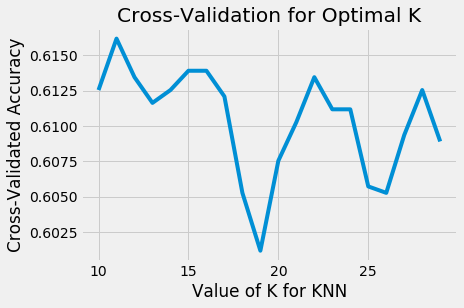

In [483]:
# plot the results
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Cross-Validation for Optimal K')
plt.savefig('Cross-Validation for Optimal K');
#Looks like the Max value for K is around K=25, which is close to the K=23 we calculated the long way

In [484]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_);
#These best Model is K=25 with an Accuracy Score of 52.9%!
#This is a smidge better than the 51.6% we calculated the long way

0.6161891768985903
{'n_neighbors': 11}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=11, p=2,
           weights='uniform')


# Okay, now that we've seen what KNN and Decision Trees can do, let's have a look at Random Forests.
Let's start with the Regressor and then we'll look at Classifer. We're going to use Standard Scaler and GridSearch to appropriately scale and optimize the Features

In [485]:
#We'll start by using the RF Regressor to figure out the optimal Max_Features and n_estimators
from sklearn.ensemble import RandomForestRegressor
rfreg = RandomForestRegressor()
rfreg

# list of values to try for n_estimators. Figure out how many Trees you need to build.
#Here’s we’re testing up to 1500 trees by increments of 50, starting at 500
estimator_range = range(500, 1500, 50)

# list to store the average RMSE for each value of n_estimators
RMSE_scores = []

In [486]:
#fit X & y
feature_cols =[
'type_x',
'tier_x',
'iclevel_x',
'region_x',
'barrons',
'exp_instr_pc_2013',
'hbcu',
'ipeds_enrollment_2013',
'public', 
'avgfacsal_2013',
'scorecard_netprice_2013',
'grad_rate_150_p_2013',
'asian_or_pacific_share_fall_2000',
'black_share_fall_2000',
'hisp_share_fall_2000',
'pct_arthuman_2000',
'pct_business_2000',
'pct_health_2000',
'pct_multidisci_2000',
'pct_publicsocial_2000',
'pct_stem_2000',
'pct_socialscience_2000',
'pct_tradepersonal_2000',
'social_eliteness_score',
'tech_school',
'sticker_price_preds',
'rejection_rate_preds' 
]

X = table[feature_cols]
y = table['upward_mobility_score']

In [487]:
from sklearn.preprocessing import StandardScaler

#Scale the X Values
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# check that it standardized properly
print(X_scaled[:, 0].mean())
print(X_scaled[:, 0].std())
print(X_scaled[:, 1].mean())
print(X_scaled[:, 1].std())
#The first 2 columns look to have a mean of 0 and StDev=1, which is expected


1.2278592068614738e-16
1.0000000000000002
7.754900253861939e-17
1.0


C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  


In [488]:
# use 5-fold cross-validation with each value of n_estimators (WARNING: SLOW!)
for estimator in estimator_range:
    rfreg = RandomForestRegressor(n_estimators=estimator, random_state=1)
    MSE_scores = cross_val_score(rfreg, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

#Check out the RMSE Scores
RMSE_scores

[0.14773193708849927,
 0.14781202818960493,
 0.147796869771452,
 0.14770115651323282,
 0.1477093462882927,
 0.14766982188782024,
 0.14764983472314583,
 0.14755823386439215,
 0.14745151388703454,
 0.1474599420207848,
 0.14748927269295023,
 0.14755388599976754,
 0.14749994934684507,
 0.14747027740729662,
 0.14751514128372084,
 0.14752667701162403,
 0.1476137800205823,
 0.14763938783785013,
 0.14759808237396652,
 0.14762794326540307]

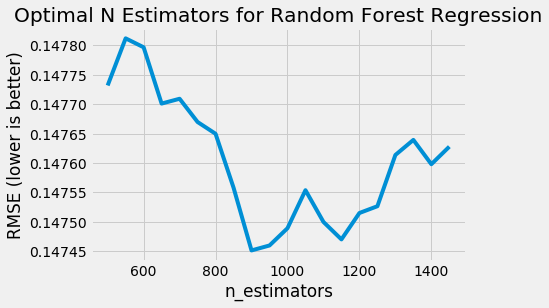

In [489]:
# plot n_estimators (x-axis) versus RMSE (y-axis)
plt.plot(estimator_range, RMSE_scores)
plt.xlabel('n_estimators')
plt.ylabel('RMSE (lower is better)');
plt.title('Optimal N Estimators for Random Forest Regression')
plt.savefig('Optimal N Estimators for Random Forest Regression.png');
#Let's Use 900 n-estimators

In [490]:
#Let's Tune another Hyperparameter: Max_features
# list of values to try for max_features
feature_range = range(1, len(feature_cols)+1)

# list to store the average RMSE for each value of max_features
RMSE_scores = []

# use 10-fold cross-validation with each value of max_features (WARNING: SLOW!)
for feature in feature_range:
    rfreg = RandomForestRegressor(n_estimators=900, max_features=feature, random_state=1)
    MSE_scores = cross_val_score(rfreg, X_scaled, y, cv=10, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

#Check out the RMSE Scores
RMSE_scores

[0.15217907229648195,
 0.1472579276280094,
 0.14521270014819188,
 0.1436543600641651,
 0.1427945371663581,
 0.14242368376491027,
 0.14186621392357943,
 0.14220167439381967,
 0.14216262525225015,
 0.14212658559321406,
 0.14188028862893873,
 0.14200080555533173,
 0.14219430395345192,
 0.14232062811778662,
 0.14292645912622404,
 0.14270069247114298,
 0.1432148769766956,
 0.14352219468575023,
 0.14369181462128394,
 0.14413044692084734,
 0.14444432088529927,
 0.14451305926205765,
 0.1451270102806121,
 0.14563688818868106,
 0.14603212976010255,
 0.14640978289282017,
 0.1468132594144098]

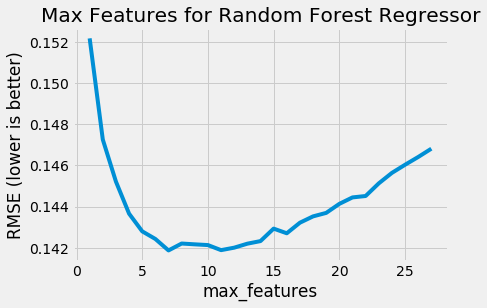

In [491]:
# plot max_features (x-axis) versus RMSE (y-axis)
plt.plot(feature_range, RMSE_scores)
plt.xlabel('max_features')
plt.ylabel('RMSE (lower is better)')
plt.title('Max Features for Random Forest Regressor')
plt.savefig('Max Features for Random Forest Regressor.png')

# Now, let's fit a Random Forest Regression with the Optimal HyperParameters
Let's Standardize Scale the Features first

In [492]:
# max_features=10 is best and n_estimators=900 is sufficiently large
rfreg = RandomForestRegressor(n_estimators=900, max_features=10, oob_score=True, random_state=1)
rfreg.fit(X_scaled, y)

#Predict Upward Mobility Score using ALL data
pred = rfreg.predict(X_scaled)
table['RF_Regressor_Predicted_UM_Score'] = pred

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [493]:
#Evaluating the Random Forest Regression Model - Comparing with Train/Test Splits & RMSE
#calculate metrics by hand
#Using Optimal n_estimators=900, max_features=10
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42)

#Build the Model
rfreg = RandomForestRegressor(n_estimators=900, max_features=10, oob_score=True, random_state=1)
rfreg.fit(X_train, y_train)

#Get the prediction
y_pred = rfreg.predict(X_test)

In [494]:
#Return RMSE Root Mean Squared Error for the Train-Test Split
print("RF Regression RMSE for Train-Test Split:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("RF Regression RMSE for entire dataset (using untrained Model):", np.sqrt(metrics.mean_squared_error(y, pred)))
#This is a bit of an improvement from the Linear Regression, which had RMSE values of 0.15504 & 0.

RF Regression RMSE for Train-Test Split: 0.141407538563932
RF Regression RMSE for entire dataset: 0.052050795094872405


In [495]:
# compute feature importances
pd.DataFrame({'feature':feature_cols, 'importance':rfreg.feature_importances_}).sort_values('importance', ascending=False)

feature  importance
4                            barrons    0.198514
23            social_eliteness_score    0.178230
1                             tier_x    0.114658
9                     avgfacsal_2013    0.090606
11              grad_rate_150_p_2013    0.087012
12  asian_or_pacific_share_fall_2000    0.033776
5                  exp_instr_pc_2013    0.033531
25               sticker_price_preds    0.030699
2                          iclevel_x    0.030110
20                     pct_stem_2000    0.028446
14              hisp_share_fall_2000    0.021045
15                 pct_arthuman_2000    0.019113
7              ipeds_enrollment_2013    0.017046
21            pct_socialscience_2000    0.016939
17                   pct_health_2000    0.015678
13             black_share_fall_2000    0.015635
26              rejection_rate_preds    0.012514
18               pct_multidisci_2000    0.011156
10           scorecard_netprice_2013    0.011076
16                 pct_business_2000    0.010256
22            pct_tradepersonal_2000    0.007820
19             pct_publicsocial_2000    0.006999
3                           region_x    0.004589
24                       tech_school    0.001817
0                             type_x    0.001562
8                             public    0.000745
6                               hbcu    0.000430

# Now, let's build a Random Forest Classifier Model

In [512]:
#Import the library and predict which Class the school will fall under
from sklearn.ensemble import RandomForestClassifier
rfclf = RandomForestClassifier()

#define X & y
X = table[feature_cols]
y = table['um_bucket_level']


In [513]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  """


In [514]:
#Fit the Model, looking at ALL the data
#We're using Optimal n_estimators=900, max_features=10
rfclf = RandomForestClassifier(n_estimators=900, max_features=10, oob_score=True, random_state=42)
rfclf.fit(X_scaled, y)
pred = rfclf.predict(X_scaled)

In [515]:
X_scaled.shape

(2199, 27)

In [516]:
# split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=1)

rfclf = RandomForestClassifier(n_estimators=900, max_features=10, oob_score=True, random_state=42)
rfclf.fit(X_train, y_train)

#Find the Predicted y_pred using testing data
y_pred = rfclf.predict(X_test)

#Find the predicted class using ALL data & Trained Model
y_pred_class = rfclf.predict(X_scaled)
table['Predicted_RF_Class'] = y_pred_class

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [517]:
#Look at the Accuracy using Train-Test-Split
print(metrics.accuracy_score(y_test, y_pred))

0.6527272727272727


In [518]:
#Look at the Accuracy using ALL Data
print(metrics.accuracy_score(y, y_pred_class))

0.9131423374261027


In [503]:
#Build New Columns.  This is using the trained model
table['RF_Pred_Class1'] = rfclf.predict_proba(X_scaled)[:,0]
table['RF_Pred_Class2'] = rfclf.predict_proba(X_scaled)[:,1]
table['RF_Pred_Class3'] = rfclf.predict_proba(X_scaled)[:,2]
table['RF_Pred_Class4'] = rfclf.predict_proba(X_scaled)[:,3]
table['RF_Pred_Class5'] = rfclf.predict_proba(X_scaled)[:,4]

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [504]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rfclf, X_scaled, y, cv=10, scoring='neg_mean_squared_error')
print("Cross-Val Accuracy using RF Classifier:", np.mean(np.sqrt(-scores)))


Cross-Val Accuracy using RF Classifier: 0.6479482356062327


In [519]:
#Let's look at the Confusion Matrix using Train-test-split
metrics.confusion_matrix(y_test, y_pred)
#Seems that this Model does a very good job at predicting the correct class without being confused

array([[ 52,  19,   5,   0,   0],
       [ 22, 106,  40,   0,   0],
       [  5,  32, 111,  16,   0],
       [  1,   2,  25,  56,   3],
       [  1,   0,   6,  14,  34]], dtype=int64)

In [520]:
#Let's look at the Confusion Matrix using all the Data
metrics.confusion_matrix(y, y_pred_class)

array([[306,  19,   5,   0,   0],
       [ 22, 586,  40,   0,   0],
       [  5,  32, 620,  16,   0],
       [  1,   2,  25, 326,   3],
       [  1,   0,   6,  14, 170]], dtype=int64)

In [507]:
# RECALL
print("Recall Score by Class:", metrics.recall_score(y, y_pred_class,  average=None))

# PRECISION
#This will return the total ratio of tp/(tp + fp)
print("Total Ratio of TP/(TP+FP) precision:", metrics.precision_score(y, y_pred_class, average='micro'))

#This will return the Precision Score for Each Class
print("Precision Score for Each Class:", metrics.precision_score(y, y_pred_class, average=None))

# F1 Score
print("F1 Score by Class:", metrics.f1_score(y, y_pred_class, average=None))

Recall Score by Class: [0.92727273 0.90432099 0.92124814 0.91316527 0.89005236]
Total Ratio of TP/(TP+FP) precision: 0.9131423374261027
Precision Score for Each Class: [0.91343284 0.9170579  0.8908046  0.91573034 0.98265896]
F1 Score by Class: [0.92030075 0.91064491 0.90577064 0.914446   0.93406593]


In [521]:
# RECALL
print("Recall Score by Class:", metrics.recall_score(y_test, y_pred, average=None))

# PRECISION
#This will return the total ratio of tp/(tp + fp)
print("Total Ratio of TP/(TP+FP) precision:", metrics.precision_score(y_test, y_pred, average='micro'))

#This will return the Precision Score for Each Class
print("Precision Score for Each Class:", metrics.precision_score(y_test, y_pred, average=None))

# F1 Score
print("F1 Score by Class:", metrics.f1_score(y_test, y_pred, average=None))

Recall Score by Class: [0.68421053 0.63095238 0.67682927 0.64367816 0.61818182]
Total Ratio of TP/(TP+FP) precision: 0.6527272727272727
Precision Score for Each Class: [0.64197531 0.66666667 0.59358289 0.65116279 0.91891892]
F1 Score by Class: [0.66242038 0.64831804 0.63247863 0.64739884 0.73913043]


In [522]:
# compute feature importances from RF Classifier
pd.DataFrame({'feature':feature_cols, 'importance':rfclf.feature_importances_}).sort_values('importance', ascending=False)

feature  importance
23            social_eliteness_score    0.102535
9                     avgfacsal_2013    0.078376
11              grad_rate_150_p_2013    0.068945
4                            barrons    0.068349
12  asian_or_pacific_share_fall_2000    0.057738
25               sticker_price_preds    0.053007
1                             tier_x    0.049943
14              hisp_share_fall_2000    0.046936
13             black_share_fall_2000    0.044415
5                  exp_instr_pc_2013    0.042636
7              ipeds_enrollment_2013    0.039754
10           scorecard_netprice_2013    0.036507
20                     pct_stem_2000    0.036235
26              rejection_rate_preds    0.035703
21            pct_socialscience_2000    0.033713
15                 pct_arthuman_2000    0.033055
18               pct_multidisci_2000    0.031415
16                 pct_business_2000    0.031370
17                   pct_health_2000    0.027710
19             pct_publicsocial_2000    0.024119
22            pct_tradepersonal_2000    0.020112
2                          iclevel_x    0.016278
3                           region_x    0.011900
0                             type_x    0.003327
24                       tech_school    0.002479
8                             public    0.002177
6                               hbcu    0.001269

# Now, let's try using GridSearch to actually Optimize these Hyperparameters seamlessly

In [509]:
#import Library
from sklearn.model_selection import GridSearchCV

# define the parameter values that should be searched
n_range = list(range(500, 1500, 50))
num_features = list(range(2,26, 2))

# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_estimators=n_range, max_features=num_features)
print(param_grid)

#Call in the Model you’d like to run the Parameter grid through
rfclf = RandomForestClassifier()

{'n_estimators': [500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450], 'max_features': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24]}


In [510]:
#Warning: SLOW!
# instantiate the grid. This is just like a Cross-Validation split
#notice that we don't put in x, y.  We're not fitting the data here.
grid = GridSearchCV(rfclf, param_grid, cv=10, scoring='accuracy', n_jobs=-1, return_train_score=True)

# fit the grid with data
grid.fit(X_scaled, y)

KeyboardInterrupt: 

In [ ]:
# view the complete results (list of named tuples)
pd.DataFrame(grid.cv_results_)

In [ ]:
# examine the first tuple
print(grid.cv_results_['params'][0])
print(grid.cv_results_['mean_test_score'][0])

# create a list of the mean scores only
grid_mean_scores = [result for result in grid.cv_results_['mean_test_score']]
print(grid_mean_scores)
#Average accuracy of 63.8%, however, says I only have 1 max_feature?

In [ ]:
# examine the best model hyperparameters for Random Forest Classifier
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_);
#Max Features=8 and n_estimators of 223 produces the best Model

# Finally, Let's build a Random Forest Regressor to Predict the Continuous variable of Upward Mobility Score
We're going to use n_estimators=222 & max_features=9

In [523]:
from sklearn.ensemble import RandomForestRegressor
rfreg = RandomForestRegressor(n_estimators=900, max_features=10, oob_score=True, random_state=1)

feature_cols =[
'type_x',
'tier_x',
'iclevel_x',
'region_x',
'barrons',
'exp_instr_pc_2013',
'hbcu',
'ipeds_enrollment_2013',
'public', 
'avgfacsal_2013',
'scorecard_netprice_2013',
'grad_rate_150_p_2013',
'asian_or_pacific_share_fall_2000',
'black_share_fall_2000',
'hisp_share_fall_2000',
'pct_arthuman_2000',
'pct_business_2000',
'pct_health_2000',
'pct_multidisci_2000',
'pct_publicsocial_2000',
'pct_stem_2000',
'pct_socialscience_2000',
'pct_tradepersonal_2000',
'social_eliteness_score',
'tech_school',
'sticker_price_preds',
'rejection_rate_preds' 
]

X = table[feature_cols]
y = table['upward_mobility_score']


In [524]:
# standardize the features
from sklearn.preprocessing import StandardScaler

#Scale the X Values
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  import sys


In [525]:
# check that it standardized properly
print(X_scaled[:, 0].mean())
print(X_scaled[:, 0].std())
print(X_scaled[:, 1].mean())
print(X_scaled[:, 1].std())
#The first 2 columns/features look to have a mean of 0 and StDev=1, which is expected

1.2278592068614738e-16
1.0000000000000002
7.754900253861939e-17
1.0


In [526]:
#fit RF Regressor Model using the X_scaled features (Z-Score)
rfreg.fit(X_scaled,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=10, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=900, n_jobs=None, oob_score=True, random_state=1,
           verbose=0, warm_start=False)

In [527]:
#Evaluating the Random Forest Regression Model - Comparing with Train/Test Splits & RMSE
#calculate metrics by hand
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42)

#Build the Model
rfreg = RandomForestRegressor(n_estimators=900, max_features=10, oob_score=True, random_state=1)
rfreg.fit(X_train, y_train)

#Get the prediction using the trained model
y_pred = rfreg.predict(X_test)

#store the predicted response values as new column in dataframe using trained model
#This is taking the ENTIRE dataset into account with the trained model
pred = rfreg.predict(X_scaled)
table['RF_Regressor_Predicted'] = pred

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [529]:
#Return RMSE Root Mean Squared Error for the Train-Test Split
print("RF Regression RMSE for Train-Test Split:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("RF Regression RMSE for entire dataset (using Trained Model):", np.sqrt(metrics.mean_squared_error(y, pred)))
#This is a bit of an improvement from the Linear Regression, which had RMSE values of 0.15504 & 0.14914 with and without Train-Test-Split, respectively.
#Notice the very low RMSE value when looking at the entire dataset, which is fantastic!

RF Regression RMSE for Train-Test Split: 0.141407538563932
RF Regression RMSE for entire dataset (using Trained Model): 0.08435751986237175


In [530]:
# compute feature importances from RF Regressor
pd.DataFrame({'feature':feature_cols, 'importance':rfreg.feature_importances_}).sort_values('importance', ascending=False)

feature  importance
4                            barrons    0.198514
23            social_eliteness_score    0.178230
1                             tier_x    0.114658
9                     avgfacsal_2013    0.090606
11              grad_rate_150_p_2013    0.087012
12  asian_or_pacific_share_fall_2000    0.033776
5                  exp_instr_pc_2013    0.033531
25               sticker_price_preds    0.030699
2                          iclevel_x    0.030110
20                     pct_stem_2000    0.028446
14              hisp_share_fall_2000    0.021045
15                 pct_arthuman_2000    0.019113
7              ipeds_enrollment_2013    0.017046
21            pct_socialscience_2000    0.016939
17                   pct_health_2000    0.015678
13             black_share_fall_2000    0.015635
26              rejection_rate_preds    0.012514
18               pct_multidisci_2000    0.011156
10           scorecard_netprice_2013    0.011076
16                 pct_business_2000    0.010256
22            pct_tradepersonal_2000    0.007820
19             pct_publicsocial_2000    0.006999
3                           region_x    0.004589
24                       tech_school    0.001817
0                             type_x    0.001562
8                             public    0.000745
6                               hbcu    0.000430

In [531]:
#This is the Out-of-Bag Score when using the Train-Test-Split model
rfreg.oob_score_
#This tells us 'what variation in y is explained by X'

0.7988385617838691

# Let's Take a Look at some final relationships to draw some distinct conclusions

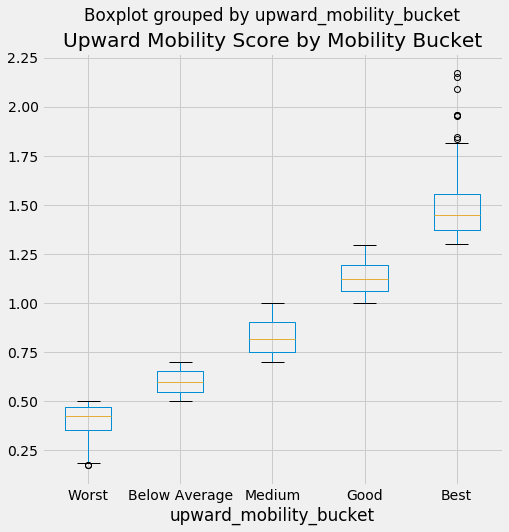

In [532]:
plt.rcParams['figure.figsize'] = [8, 8]
table.boxplot(column='upward_mobility_score', by='upward_mobility_bucket')
plt.title('Upward Mobility Score by Mobility Bucket')
plt.savefig('Upward Mobility Score by Mobility Bucket.png');
#There are certainly a few outliers that go above and beyond

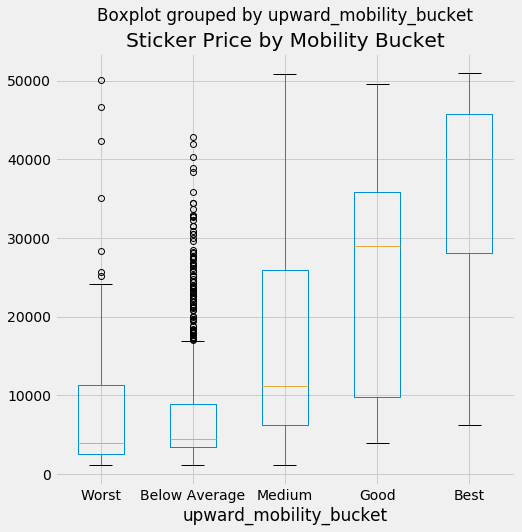

In [533]:
plt.rcParams['figure.figsize'] = [8, 8]
table.boxplot(column='sticker_price_2013', by='upward_mobility_bucket')
plt.title('Sticker Price by Mobility Bucket')
plt.savefig('Sticker Price by Mobility Bucket.png');
#There are certainly a few outliers that go above and beyond
#Interestingly, you don't want to go to a school with very Poor Mobility Scores and High Tuition
#THere's a lot of Below Average Schools that are hugely overpriced. Stay away from these!! Steer Clear!

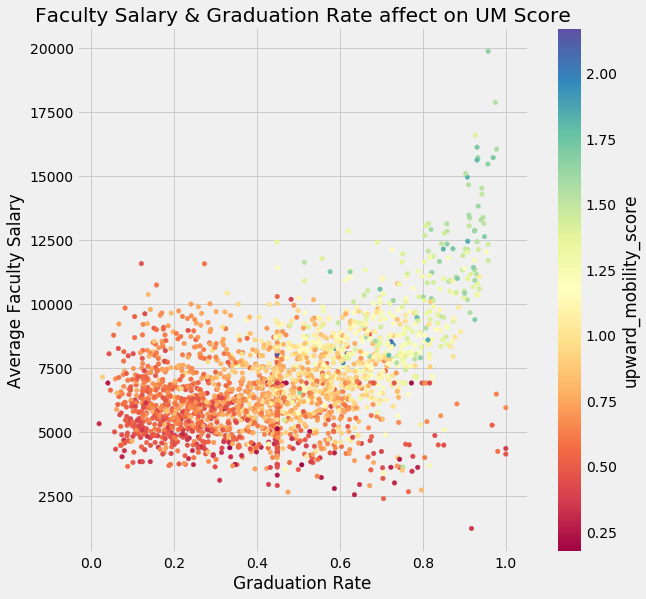

In [534]:
#Let's look at combo effects of Faculty Salary & Graudation Rate on Upward Mobility Score
plt.rcParams['figure.figsize'] = [9,9]
table.plot(kind='scatter', x='grad_rate_150_p_2013', y='avgfacsal_2013', c='upward_mobility_score', colormap='Spectral')

plt.ylabel('Average Faculty Salary')
plt.xlabel('Graduation Rate')
plt.title('Faculty Salary & Graduation Rate affect on UM Score')
plt.savefig('Faculty Salary & Graduation Rate affect on UM Score.png');
#The UM Score really accelerates when Avg Faculty Salary is high and Graduation Rate is High

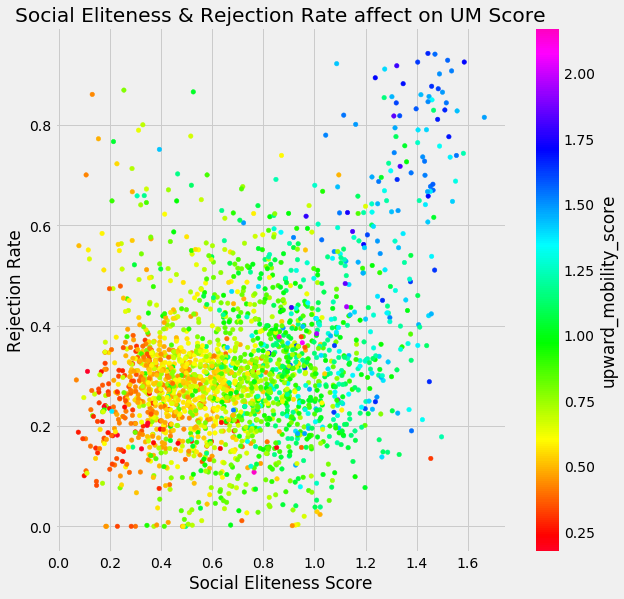

In [535]:
#Let's look at combo effects of Social Eliteness & Rejection Rate on Upward Mobility Score
plt.rcParams['figure.figsize'] = [9,9]
table.plot(kind='scatter', x='social_eliteness_score', y='rejection_rate_preds', c='upward_mobility_score', colormap='gist_rainbow')

plt.ylabel('Rejection Rate')
plt.xlabel('Social Eliteness Score')
plt.title('Social Eliteness & Rejection Rate affect on UM Score')
plt.savefig('Social Eliteness & Rejection Rate affect on UM Score.png');
#The UM Score really accelerates when Social Eliteness and Rejection Rate Increases

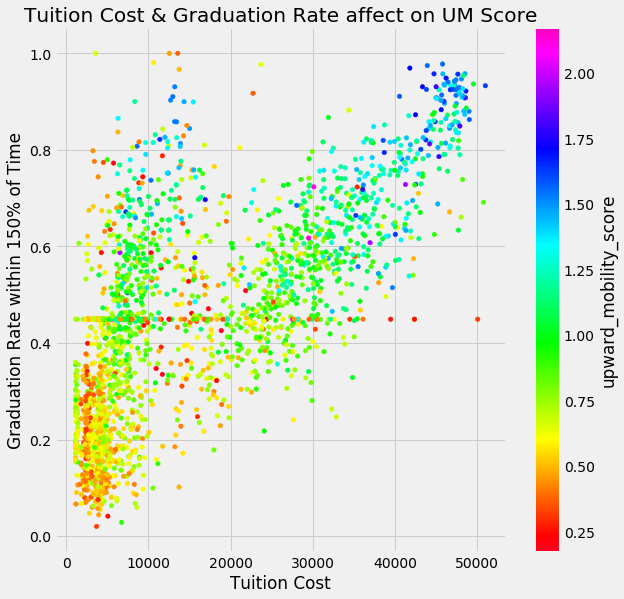

In [536]:
#Let's look at combo effects of Social Eliteness & Rejection Rate on Upward Mobility Score
plt.rcParams['figure.figsize'] = [9,9]
table.plot(kind='scatter', x='sticker_price_preds', y='grad_rate_150_p_2013', c='upward_mobility_score', colormap='gist_rainbow')

plt.ylabel('Graduation Rate within 150% of Time')
plt.xlabel('Tuition Cost')
plt.title('Tuition Cost & Graduation Rate affect on UM Score')
plt.savefig('Tuition Cost & Graduation Rate affect on UM Score.png');
#Interestingly, this says there's 2 tracks: More Expensive verus Cheaper Option.
#There are some viable alternatives at the cheaper prices, what REALLY matters is that you Graduate!

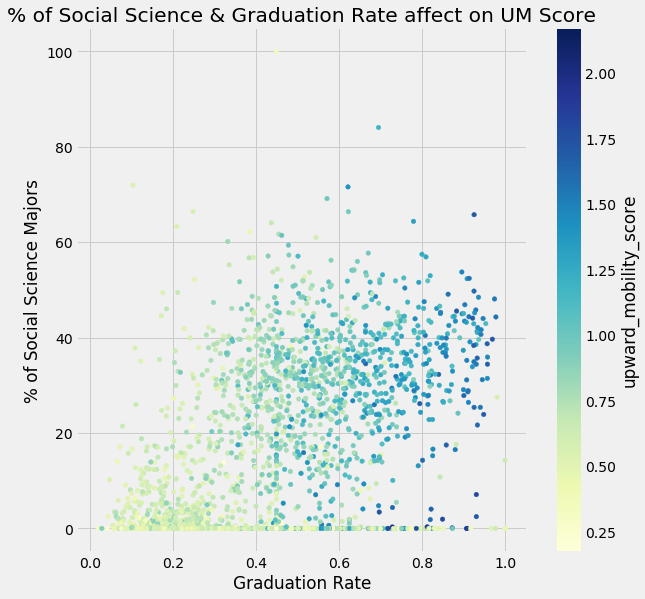

In [537]:
#Let's look at combo effects of Tier & Graudation Rate on Upward Mobility Score
plt.rcParams['figure.figsize'] = [9,9]
table.plot(kind='scatter', x='grad_rate_150_p_2013', y='pct_socialscience_2000', c='upward_mobility_score', colormap='YlGnBu')

plt.ylabel('% of Social Science Majors')
plt.xlabel('Graduation Rate')
plt.title('% of Social Science & Graduation Rate affect on UM Score')
plt.savefig('% Social Science Majors & Graduation Rate affect on UM Score.png');
#Higher percentage of Social Sciences does a very good job at predicting UM Score when combined with Graduation Rate

# What University or School has the greatest "bang for the buck"?
Let's take a look at dividing Sticker Price by Upward Mobility Score

In [538]:
#How much is a student paying for a great chance for Upward Mobility?
#Create new Feature by dividing upward mobility (multiply by 10000 first) score by sticker price 
table['bang4buck'] = table['upward_mobility_score']*10000 / table['sticker_price_preds'] 
table['bang4buck'].isnull().sum()
#The higher the bang4buck feature, the better.
#Want to find out "For every additional dollar of tuition paid, how much more Upward Mobility can I attain?"

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0

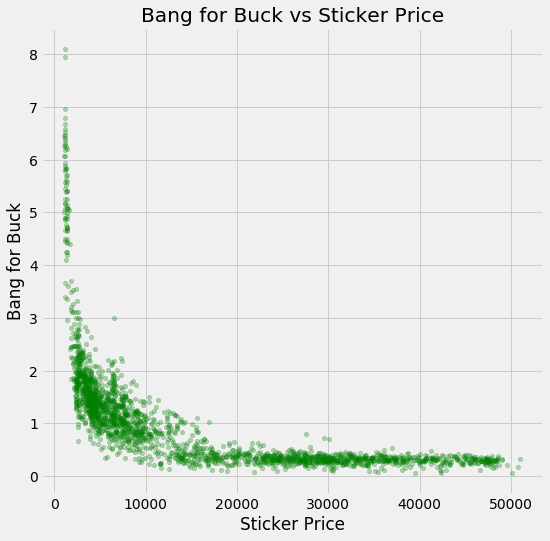

In [539]:
plt.rcParams['figure.figsize'] = [8,8]
table.plot(kind='scatter', x='sticker_price_preds', y='bang4buck', alpha=0.3, color='green')

plt.ylabel('Bang for Buck')
plt.xlabel('Sticker Price')
plt.title('Bang for Buck vs Sticker Price')
plt.savefig('Bang for Buck vs Sticker Price.png');
#There is an inverse relationship between Sticker Price and Bang for the Buck (more expensive schools have a harder time justifying their cost)

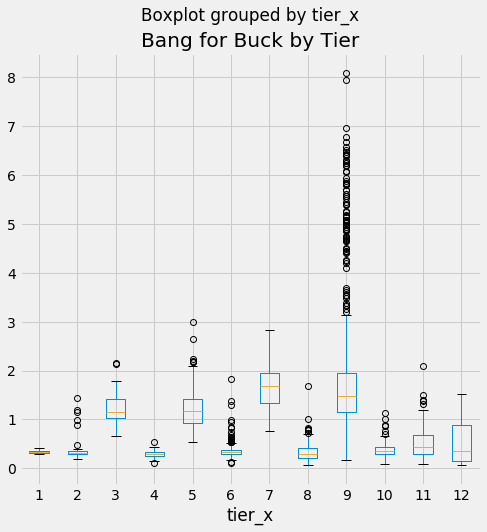

In [540]:
#Look at Bang for Buck versus Tier of School
plt.rcParams['figure.figsize'] = [8, 8]
table.boxplot(column='bang4buck', by='tier_x')
plt.title('Bang for Buck by Tier')
plt.savefig('Bang for Buck by Tier.png');
#There's a ton of quality 'bang for buck' schools in Tier 9 - identify those!
#Tier 9 is "2-year public and private not-for-profit universities"
#This shows that there's value in every Tier bucket - you don't need to just concentrate on the top tiers if you're looking to get a bang for your buck
#You can find a Quality School in every Tier.  You should throw out the Tiers but BE MINDFUL of the Barron's Selectivity Index

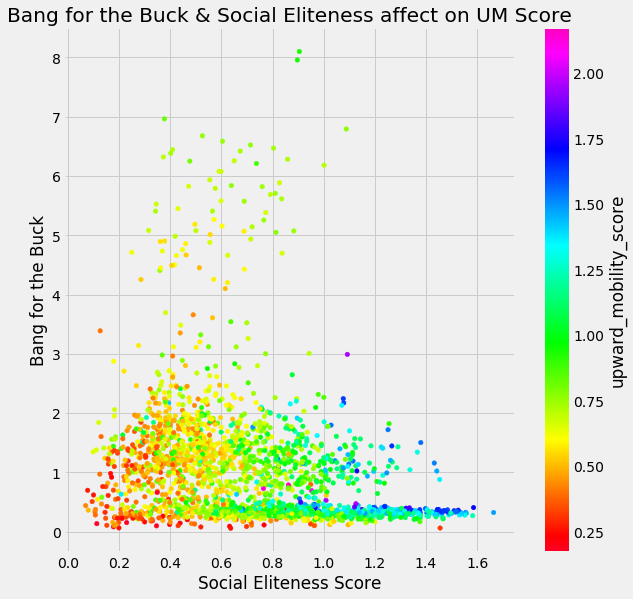

In [541]:
#Let's look at combo effects of Social Eliteness & Rejection Rate on Upward Mobility Score
plt.rcParams['figure.figsize'] = [9,9]
table.plot(kind='scatter', x='social_eliteness_score', y='bang4buck', c='upward_mobility_score', colormap='gist_rainbow')

plt.ylabel('Bang for the Buck')
plt.xlabel('Social Eliteness Score')
plt.title('Bang for the Buck & Social Eliteness affect on UM Score')
plt.savefig('Bang for the Buck & Social Eliteness affect on UM Score.png');


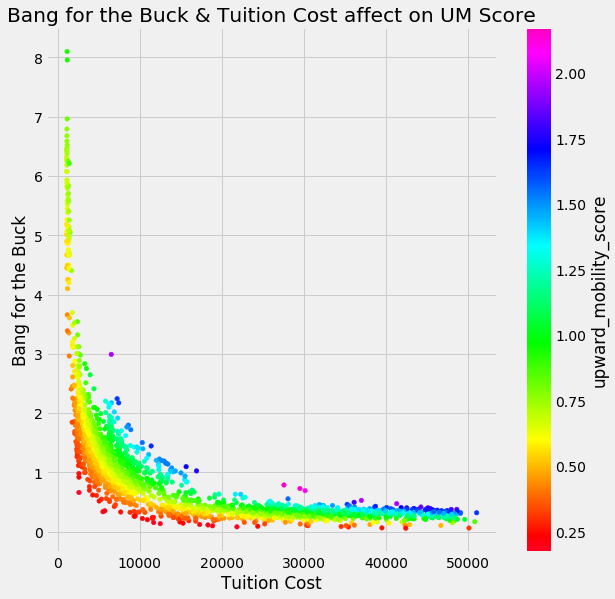

In [542]:
#Let's look at combo effects of Social Eliteness & Rejection Rate on Upward Mobility Score
plt.rcParams['figure.figsize'] = [9,9]
table.plot(kind='scatter', x='sticker_price_preds', y='bang4buck', c='upward_mobility_score', colormap='gist_rainbow')

plt.ylabel('Bang for the Buck')
plt.xlabel('Tuition Cost')
plt.title('Bang for the Buck & Tuition Cost affect on UM Score')
plt.savefig('Bang for the Buck & Tuition Cost affect on UM Score.png');


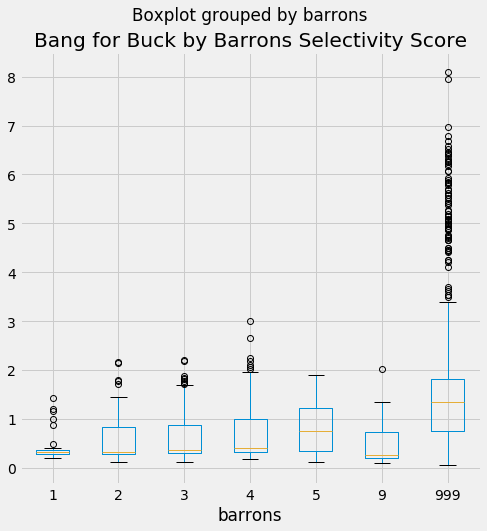

In [543]:
#Look at Bang for Buck versus Barron's
plt.rcParams['figure.figsize'] = [8, 8]
table.boxplot(column='bang4buck', by='barrons')
plt.title('Bang for Buck by Barrons Selectivity Score')
plt.savefig('Bang for Buck by Barrons Selectivity Score.png');
#Even though Barrons Selectivity ranks highly as a deterministic factor, there's tons of quality options at Non-Selective Schools as well
#There's a lot of decent Options to get your Bang for Buck even with Non-Selective Colleges (Probably Technical or Trade Schools)

In [546]:
#Export Dataframe to CSV for later use
table.to_csv('Equality of Upward Mobility Project.csv', encoding='utf-8')